In [3]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 180)
plt.rcParams["figure.figsize"] = (10, 4)

# === FILE PATHS (Windows) ===
TRANSACTIONS_PATH = r"C:\Users\lawre\Downloads\transactions_data.csv"
PRODUCTS_PATH     = r"C:\Users\lawre\Downloads\products_data.csv"
CUSTOMERS_PATH    = r"C:\Users\lawre\Downloads\customers_data (1).csv"

# === OUTPUT DIRECTORY ===
OUT_DIR = r"C:\Users\lawre\Downloads\eda_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

# Save paths
TX_CLEAN_PATH   = os.path.join(OUT_DIR, "transactions_cleaned.csv")
PR_CLEAN_PATH   = os.path.join(OUT_DIR, "products_cleaned.csv")
CU_CLEAN_PATH   = os.path.join(OUT_DIR, "customers_cleaned.csv")
FEATURES_PATH   = os.path.join(OUT_DIR, "company_features_purchase_behavior.csv")

# Load
tx = pd.read_csv(TRANSACTIONS_PATH)
pr = pd.read_csv(PRODUCTS_PATH)
cu = pd.read_csv(CUSTOMERS_PATH)

print("✅ Loaded:")
print("Transactions:", tx.shape)
print("Products    :", pr.shape)
print("Customers   :", cu.shape)

tx.head()


✅ Loaded:
Transactions: (10000, 8)
Products    : (20, 3)
Customers   : (100, 4)


Unnamed: 0  Transaction_ID  Company_ID  Product_ID  Quantity Transaction_Date  Product_Price  Total_Cost
0         0.0             1.0        88.0         6.0       NaN       2024/03/26  194379.147964   1075200.0
1         1.0             2.0        29.0        19.0      16.0    July 09, 2024   97930.993380   1428000.0
2         2.0             NaN        28.0        18.0       6.0       04/13/2024  126095.547778    940800.0
3         3.0             4.0        85.0        12.0      12.0       09-06-2023            NaN   1008000.0
4         4.0             5.0        47.0         3.0       8.0       07/06/2021   99575.609634    705600.0

In [4]:
def validate_df(df, name):
    print(f"\n===== {name.upper()} VALIDATION =====")
    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
    print("\nInfo:")
    df.info()
    print("\nBasic numeric stats:")
    display(df.describe(include=[np.number]).T)
    print("\nBasic categorical stats:")
    obj_cols = df.select_dtypes(include=["object"]).columns
    display(df[obj_cols].describe().T if len(obj_cols) else "No object columns.")

validate_df(tx, "transactions")
validate_df(pr, "products")
validate_df(cu, "customers")



===== TRANSACTIONS VALIDATION =====
Shape: (10000, 8)
Columns: ['Unnamed: 0', 'Transaction_ID', 'Company_ID', 'Product_ID', 'Quantity', 'Transaction_Date', 'Product_Price', 'Total_Cost']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9000 non-null   float64
 1   Transaction_ID    9000 non-null   float64
 2   Company_ID        9000 non-null   float64
 3   Product_ID        9000 non-null   float64
 4   Quantity          9000 non-null   float64
 5   Transaction_Date  10000 non-null  object 
 6   Product_Price     9000 non-null   float64
 7   Total_Cost        9000 non-null   float64
dtypes: float64(7), object(1)
memory usage: 625.1+ KB

Basic numeric stats:


count          mean            std           min            25%           50%           75%           max
Unnamed: 0      9000.0  4.994049e+03    2885.331476      0.000000    2501.750000  4.997500e+03  7.477250e+03  9.999000e+03
Transaction_ID  9000.0  5.005178e+03    2894.971964      1.000000    2491.750000  5.005000e+03  7.527250e+03  9.999000e+03
Company_ID      9000.0  5.058356e+01      28.900870      1.000000      25.000000  5.000000e+01  7.600000e+01  1.000000e+02
Product_ID      9000.0  1.044678e+01       5.768341      1.000000       5.000000  1.000000e+01  1.500000e+01  2.000000e+01
Quantity        9000.0  1.052878e+01       5.808062      0.000000       6.000000  1.100000e+01  1.600000e+01  2.100000e+01
Product_Price   9000.0  1.346528e+05   39058.106978  75613.362923  100686.369472  1.312978e+05  1.622215e+05  2.462791e+05
Total_Cost      9000.0  1.424246e+06  908627.390842  84000.000000  672000.000000  1.344000e+06  1.965600e+06  4.480000e+06


Basic categorical stats:


count unique         top freq
Transaction_Date  10000   4812  2021/02/21    8


===== PRODUCTS VALIDATION =====
Shape: (20, 3)
Columns: ['Product_ID', 'Product_Name', 'Product_Price']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     18 non-null     float64
 1   Product_Name   20 non-null     object 
 2   Product_Price  20 non-null     object 
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes

Basic numeric stats:


count       mean       std  min   25%   50%    75%   max
Product_ID   18.0  10.333333  6.077925  1.0  5.25  10.5  14.75  20.0


Basic categorical stats:


count unique                 top freq
Product_Name     20     20  FinPredictor Suite    1
Product_Price    20     16            ?168,000    2


===== CUSTOMERS VALIDATION =====
Shape: (100, 4)
Columns: ['Company_ID', 'Company_Name', 'Company_Profit', 'Address']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company_ID      90 non-null     float64
 1   Company_Name    100 non-null    object 
 2   Company_Profit  88 non-null     float64
 3   Address         100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.3+ KB

Basic numeric stats:


count          mean           std      min      25%      50%        75%       max
Company_ID       90.0     51.944444     28.684397      1.0     27.5     53.5      76.75     100.0
Company_Profit   88.0  76400.500000  27296.169253  30663.0  52648.5  75301.5  101089.75  118114.0


Basic categorical stats:


count unique                                           top freq
Company_Name   100    100                          Tech  Enterprises  1    1
Address        100     97  Ayala Avenue, Brgy. 101, Baguio, Philippines    2


=== Missing Values: transactions ===


Unnamed: 0        1000
Transaction_ID    1000
Company_ID        1000
Product_ID        1000
Quantity          1000
Product_Price     1000
Total_Cost        1000
dtype: int64

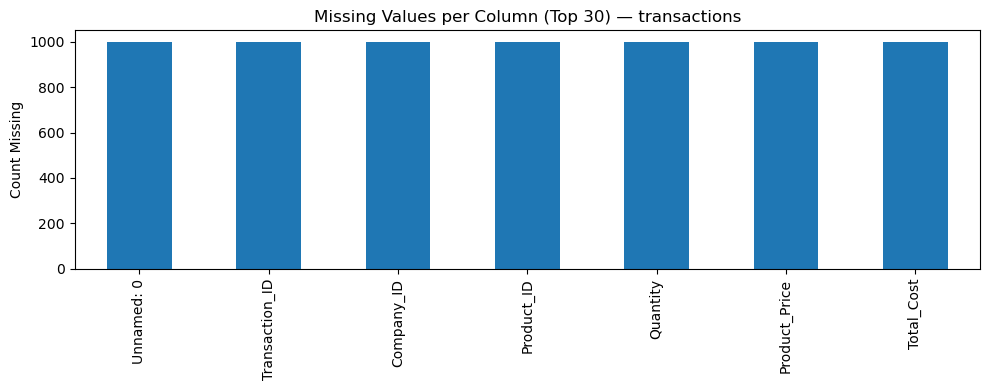


=== Missing Values: products ===


Product_ID    2
dtype: int64

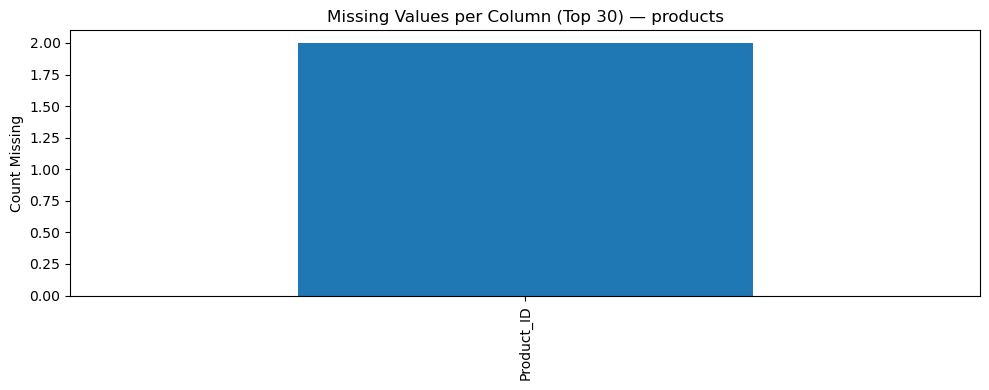


=== Missing Values: customers ===


Company_Profit    12
Company_ID        10
dtype: int64

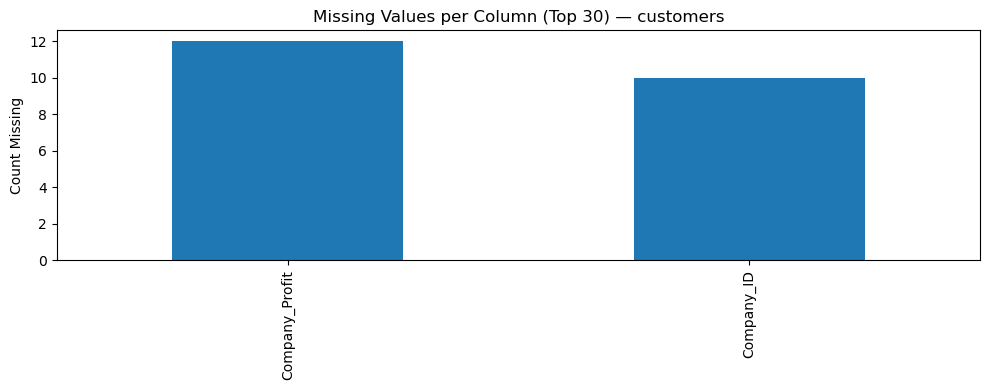

In [5]:
def missing_report(df, name):
    miss = df.isna().sum().sort_values(ascending=False)
    miss_nonzero = miss[miss > 0]
    print(f"\n=== Missing Values: {name} ===")
    display(miss_nonzero if len(miss_nonzero) else "✅ No missing values")
    if len(miss_nonzero):
        miss_nonzero.head(30).plot(kind="bar")
        plt.title(f"Missing Values per Column (Top 30) — {name}")
        plt.ylabel("Count Missing")
        plt.tight_layout()
        plt.show()

missing_report(tx, "transactions")
missing_report(pr, "products")
missing_report(cu, "customers")


In [6]:
def mixed_type_check(df, name):
    mixed_cols = []
    for c in df.columns:
        # count python types among non-null entries
        ntypes = df[c].dropna().map(type).nunique()
        if ntypes > 1:
            mixed_cols.append(c)
    print(f"\n=== Mixed Type Columns: {name} ===")
    print(mixed_cols if mixed_cols else "None")

mixed_type_check(tx, "transactions")
mixed_type_check(pr, "products")
mixed_type_check(cu, "customers")



=== Mixed Type Columns: transactions ===
None

=== Mixed Type Columns: products ===
None

=== Mixed Type Columns: customers ===
None


In [7]:
print("\n=== Redundant Columns Check ===")
# Typical redundant: Unnamed index column
redundant_tx = [c for c in tx.columns if "unnamed" in c.lower()]
print("Transactions redundant candidates:", redundant_tx)

# Too-many-unique (ID-like) columns check
def id_like_columns(df, threshold=0.98):
    n = len(df)
    candidates = []
    for c in df.columns:
        unique_ratio = df[c].nunique(dropna=False) / max(n, 1)
        if unique_ratio >= threshold:
            candidates.append((c, unique_ratio))
    return sorted(candidates, key=lambda x: x[1], reverse=True)

print("Transactions high-uniqueness cols:", id_like_columns(tx))
print("Products high-uniqueness cols:", id_like_columns(pr))
print("Customers high-uniqueness cols:", id_like_columns(cu))



=== Redundant Columns Check ===
Transactions redundant candidates: ['Unnamed: 0']
Transactions high-uniqueness cols: []
Products high-uniqueness cols: [('Product_Name', 1.0)]
Customers high-uniqueness cols: [('Company_Name', 1.0)]



================ TRANSACTIONS OUTLIER ANALYSIS ================

Numeric columns: ['Unnamed: 0', 'Transaction_ID', 'Company_ID', 'Product_ID', 'Quantity', 'Product_Price']


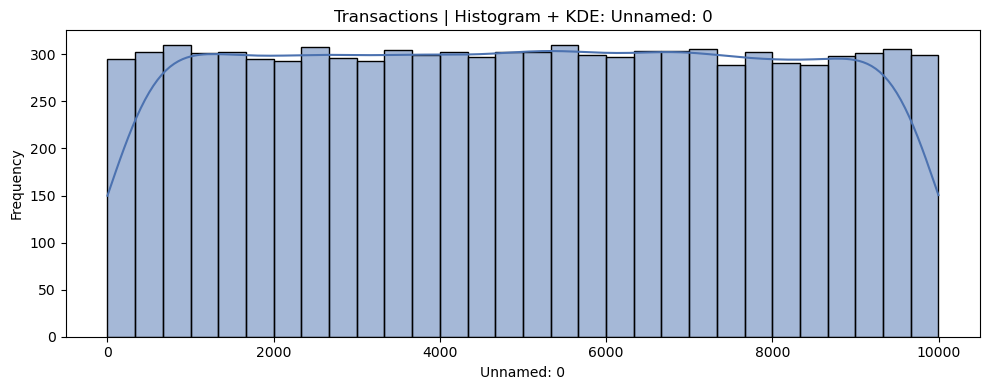

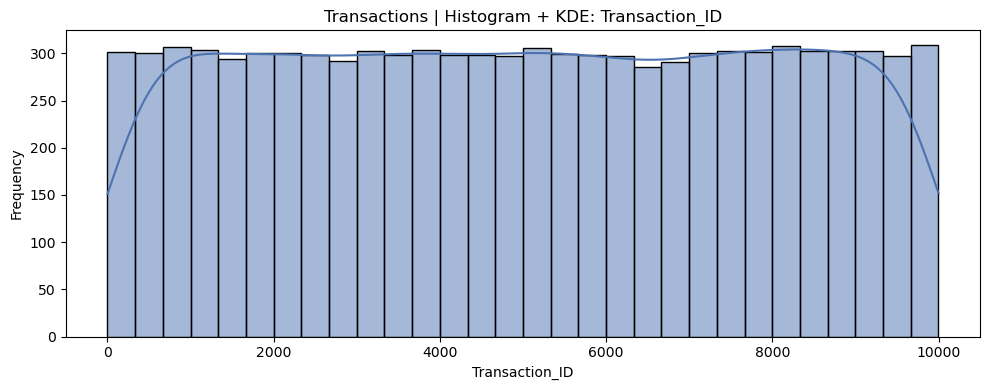

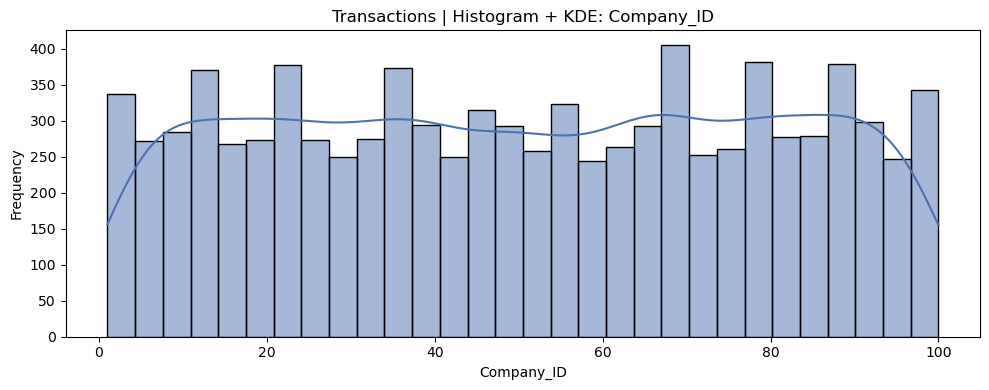

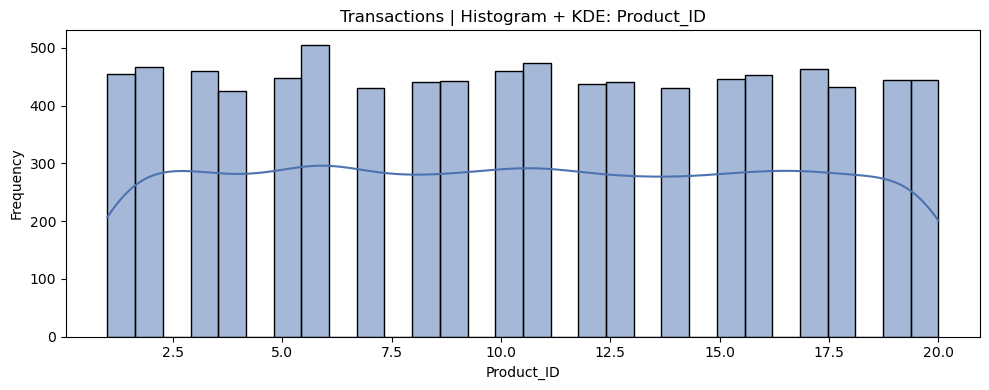

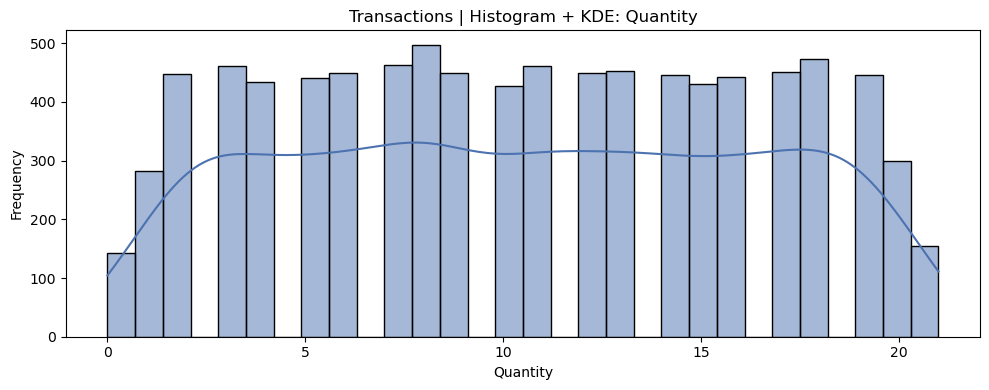

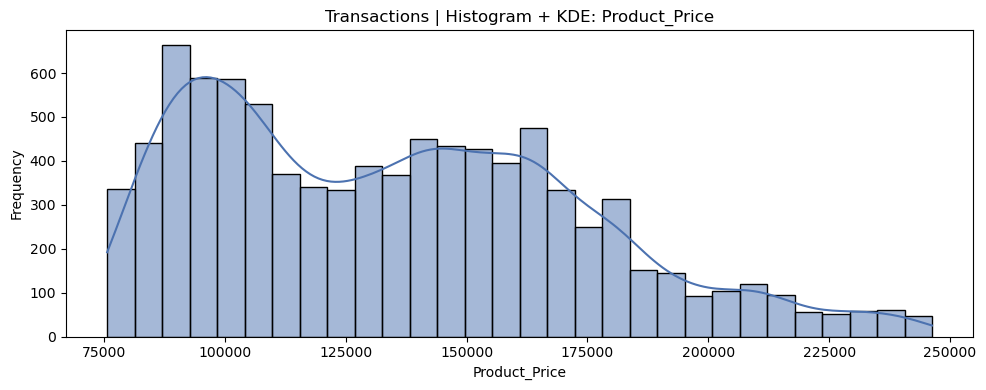

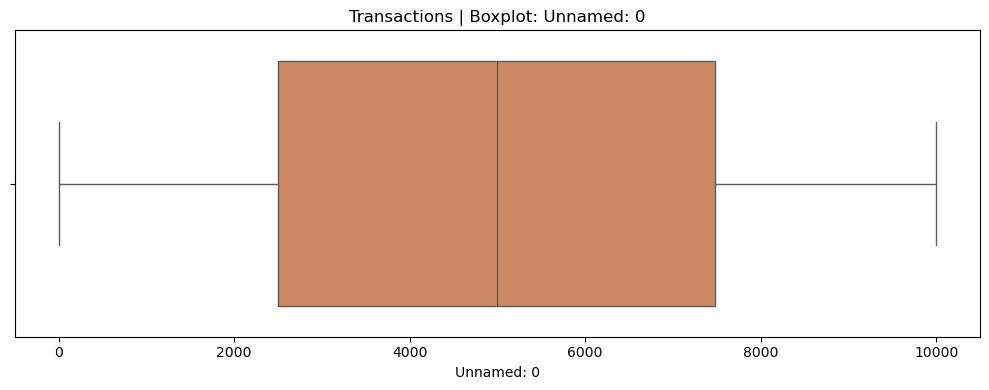

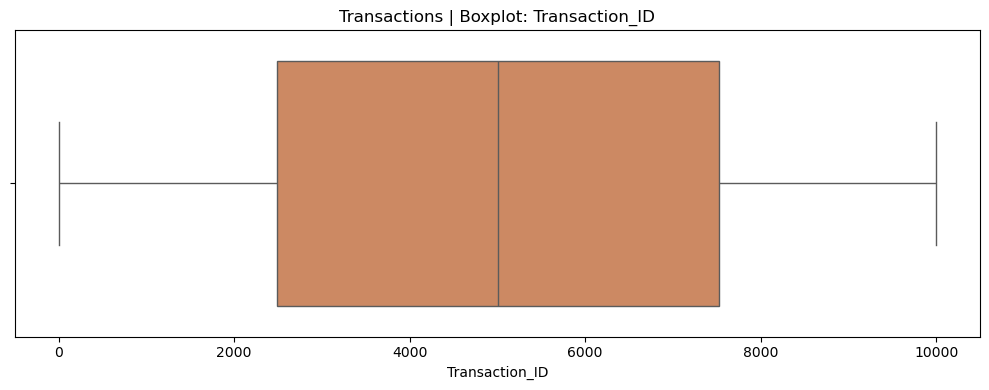

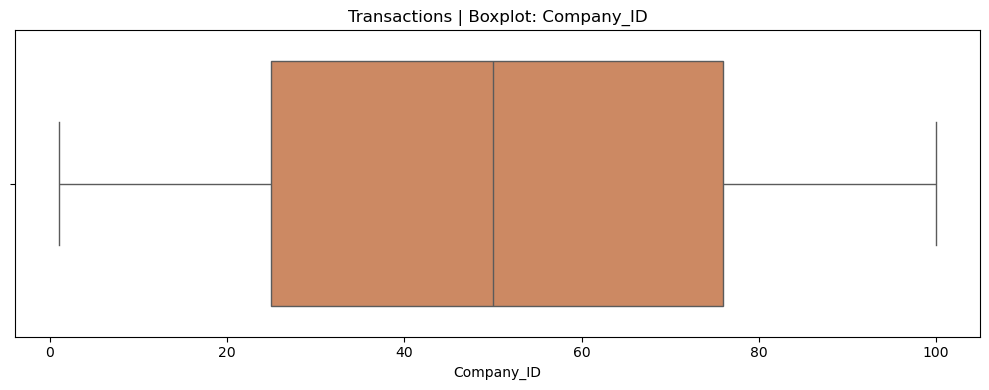

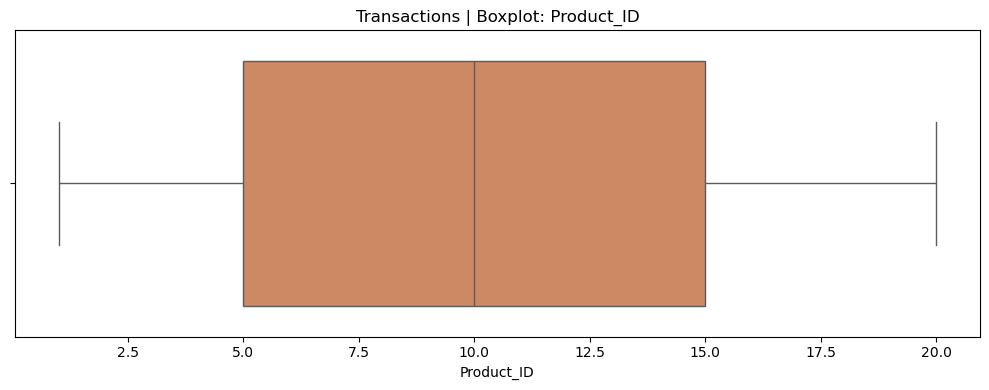

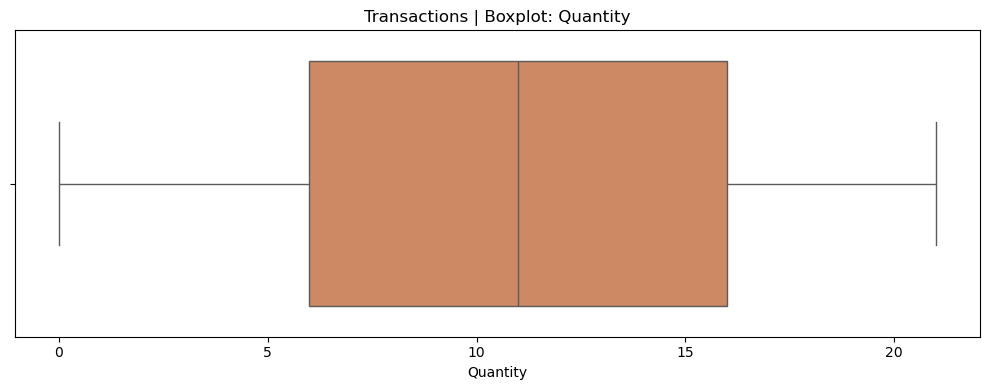

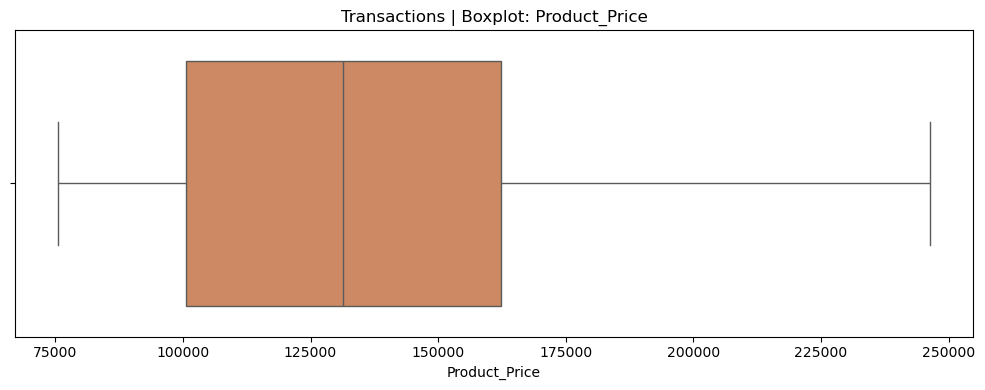

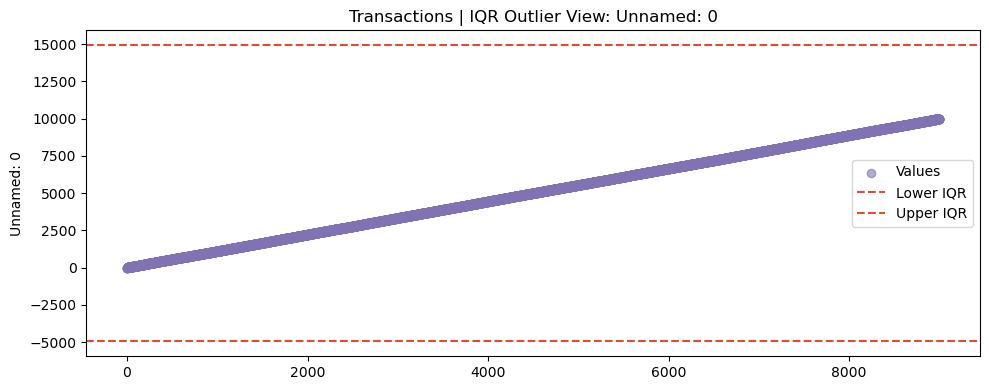

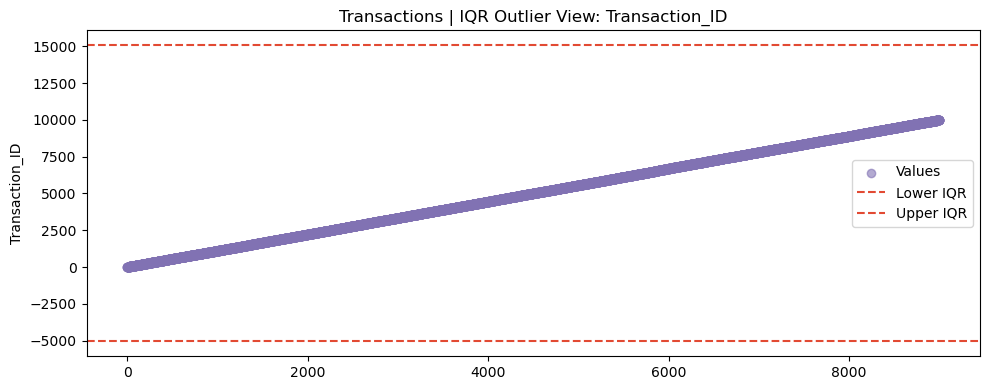

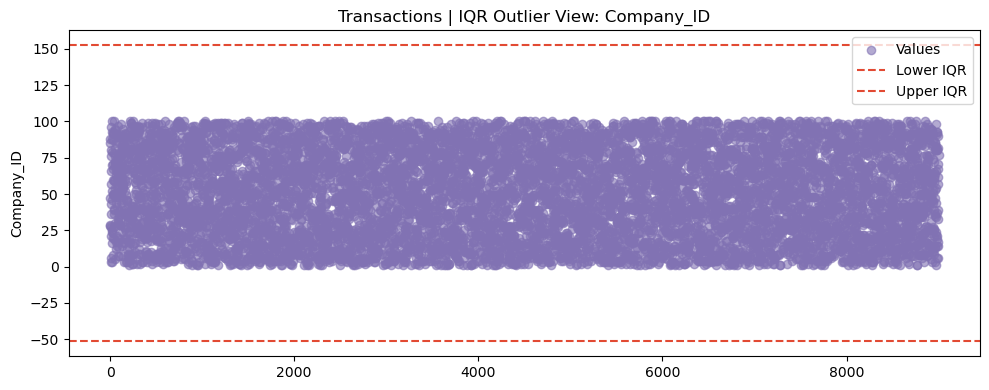

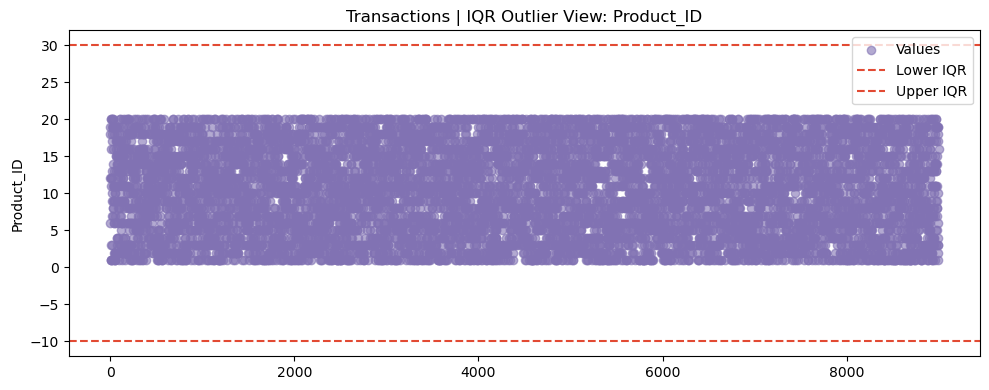

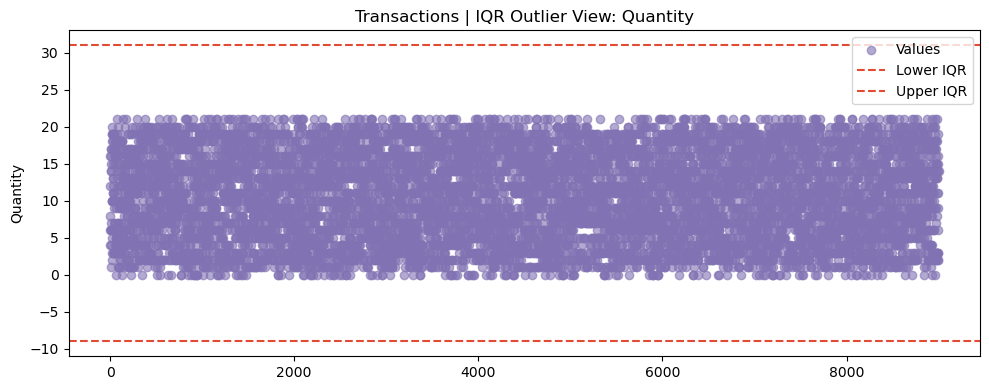

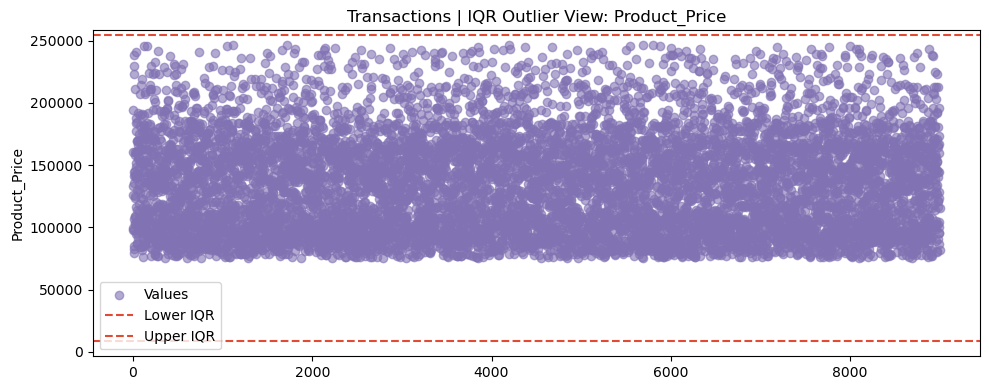

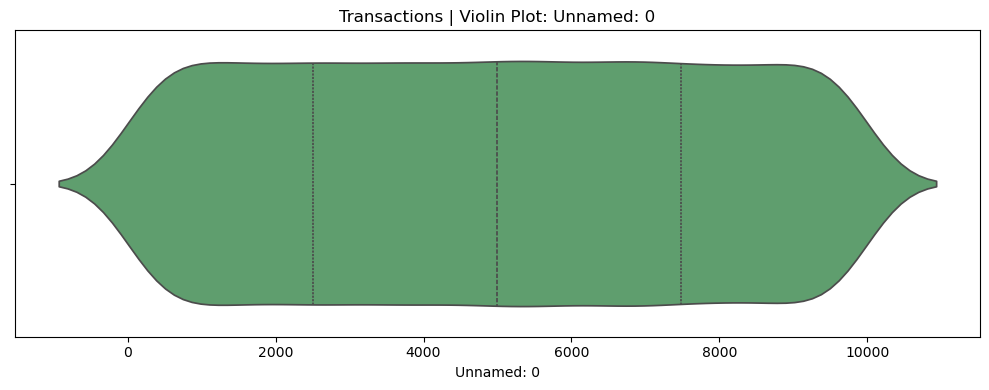

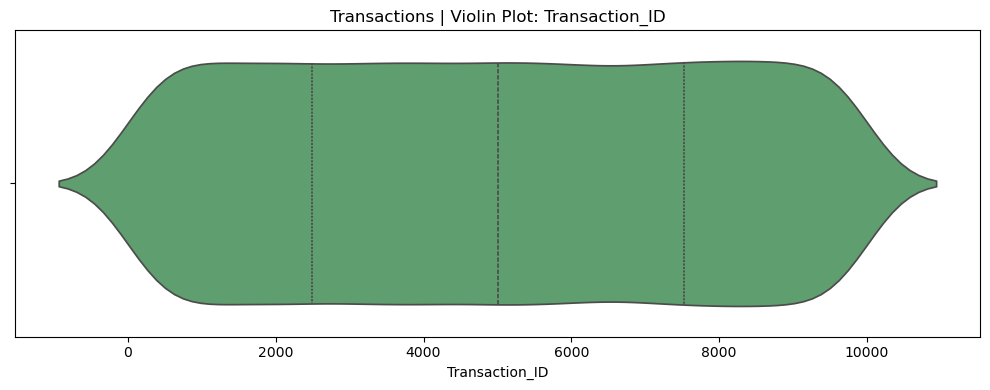

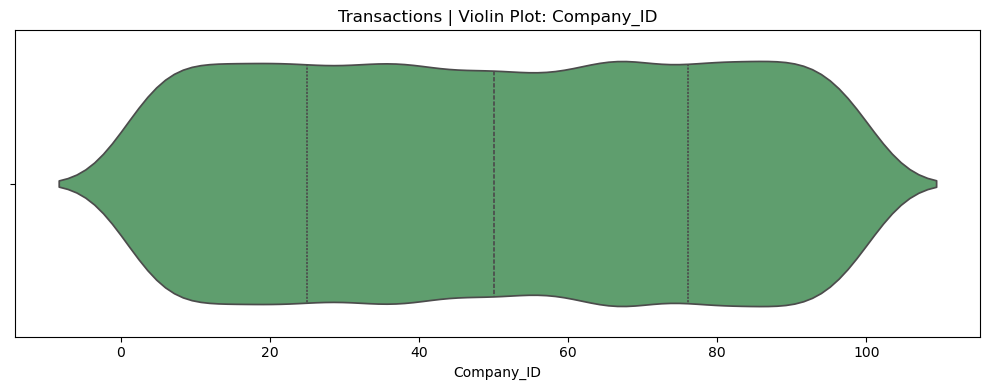

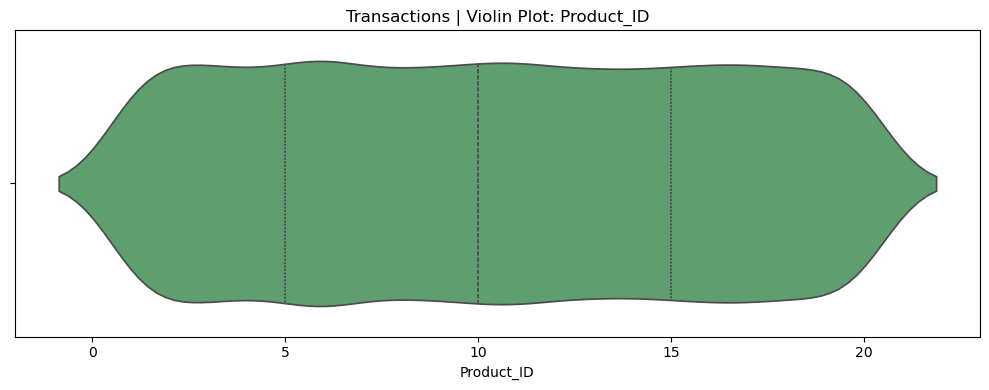

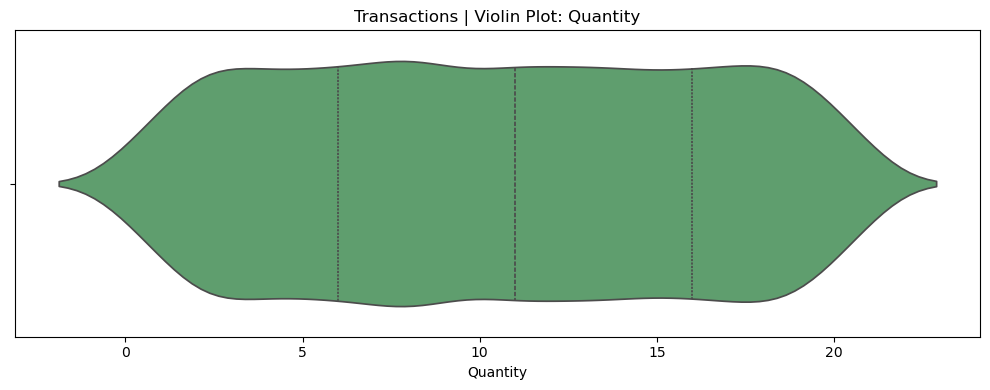

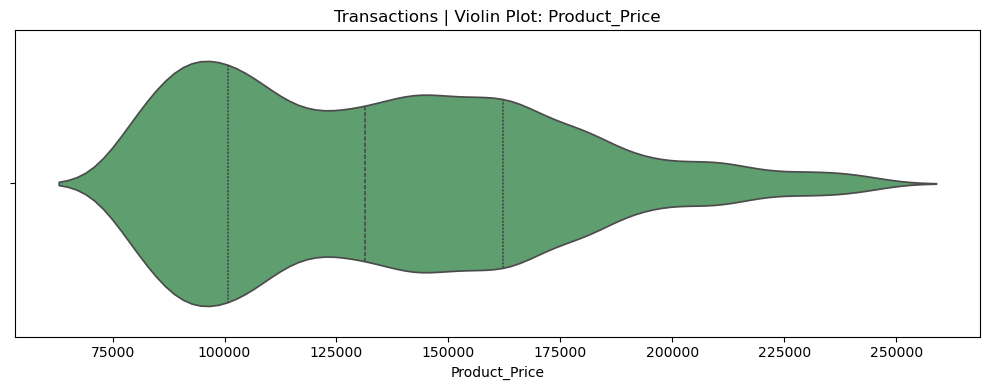

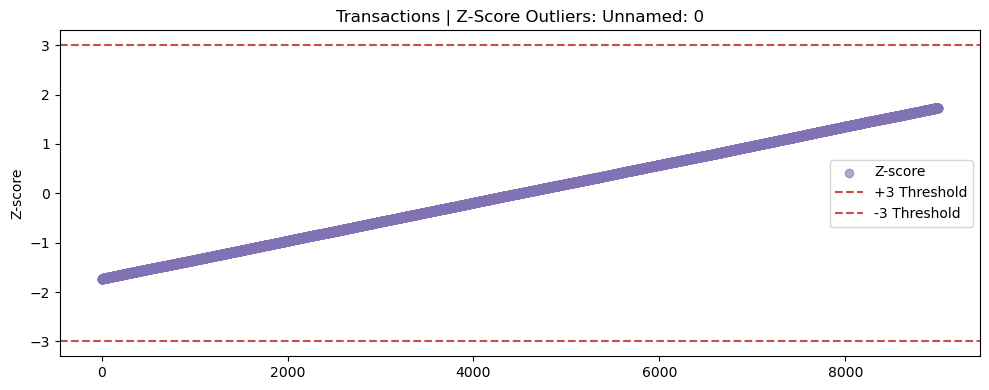

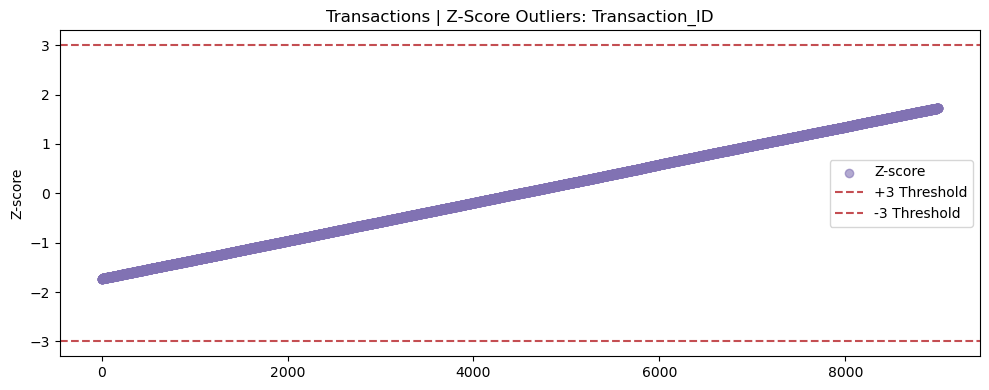

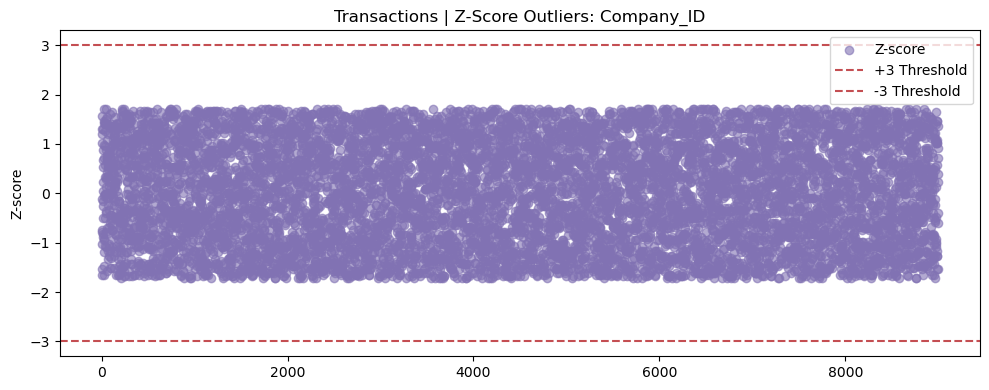

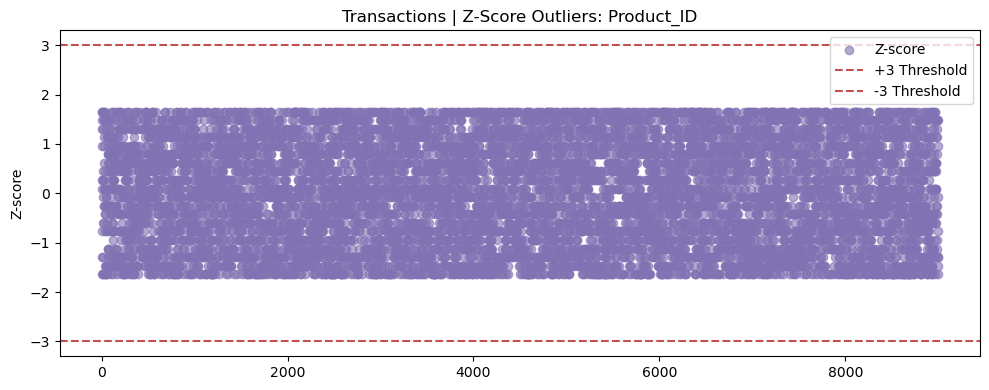

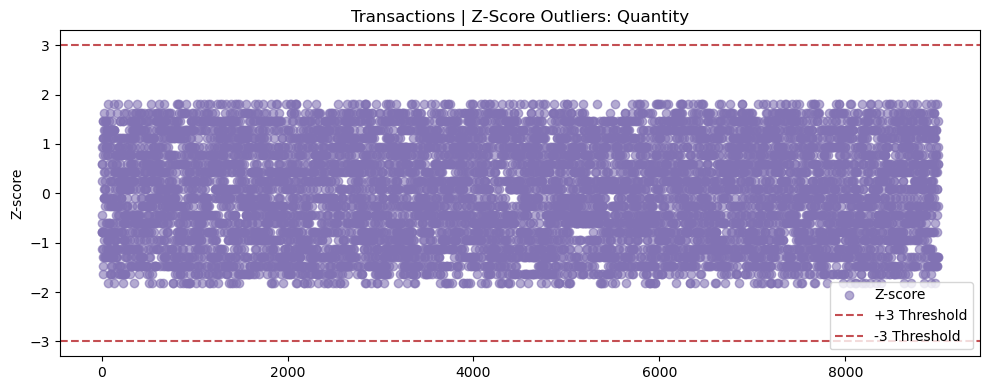

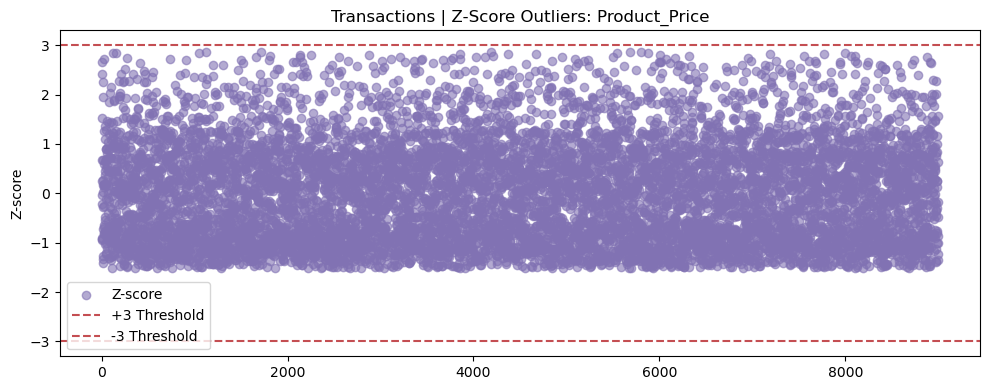


================ CUSTOMERS OUTLIER ANALYSIS ================

Numeric columns: ['Company_ID', 'Company_Profit']


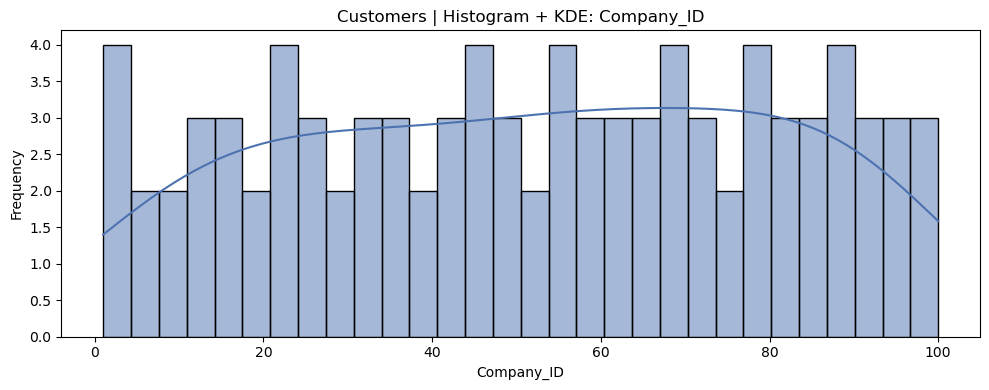

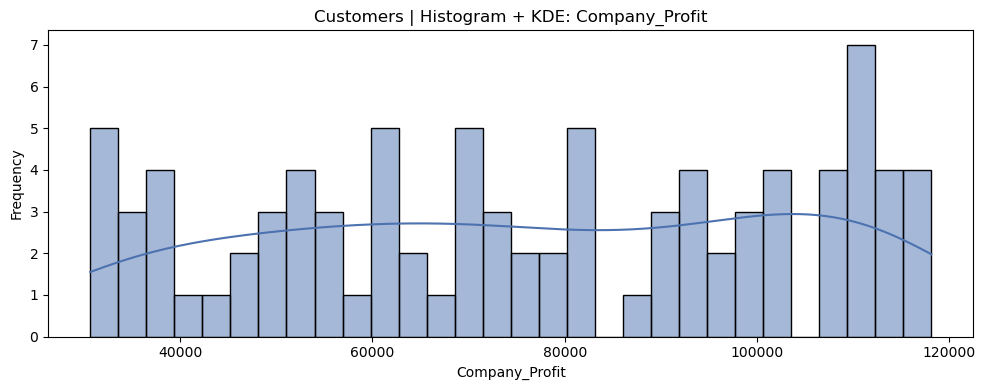

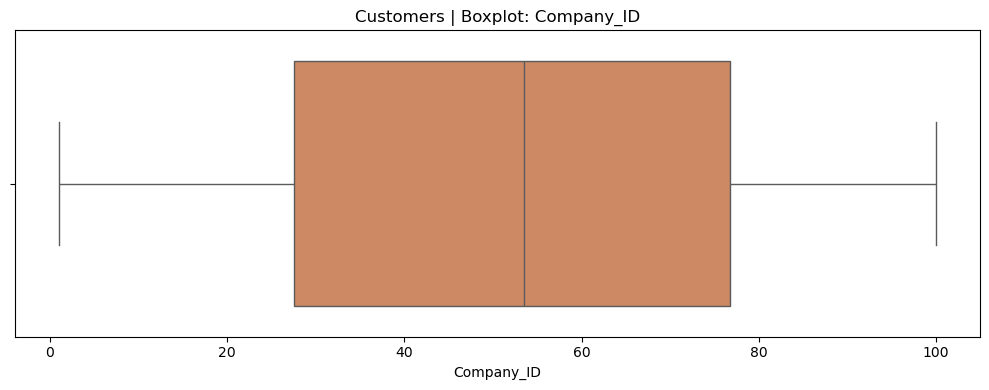

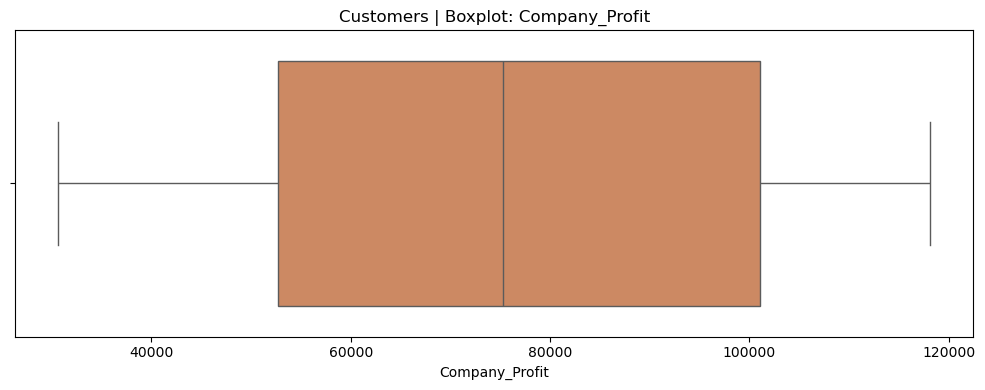

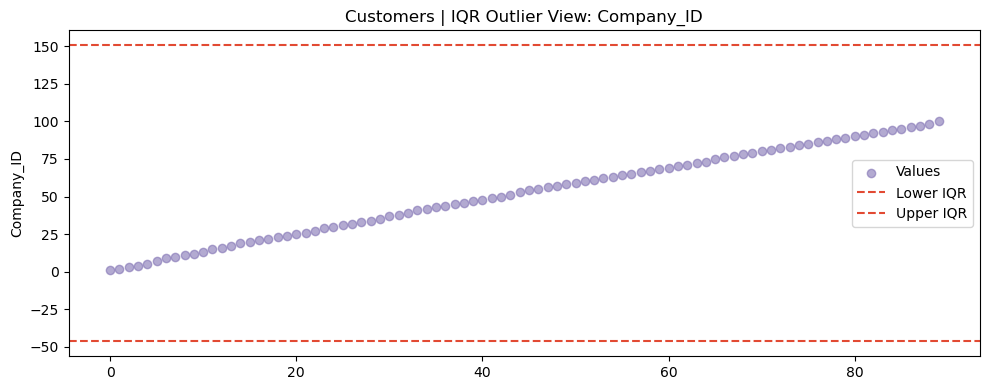

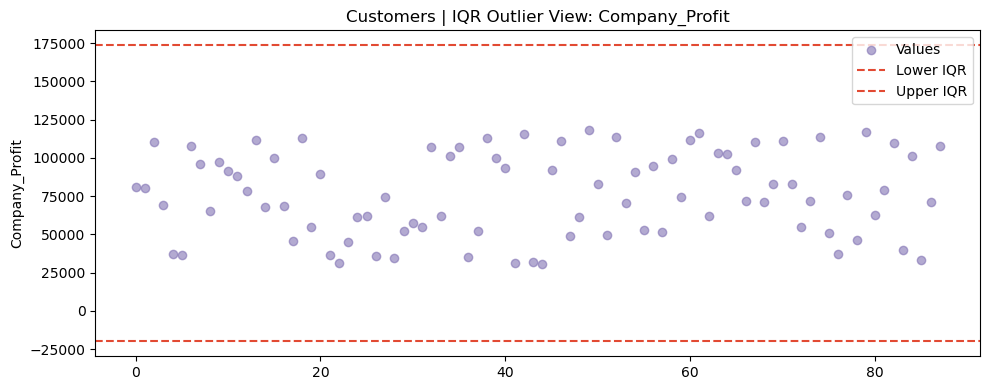

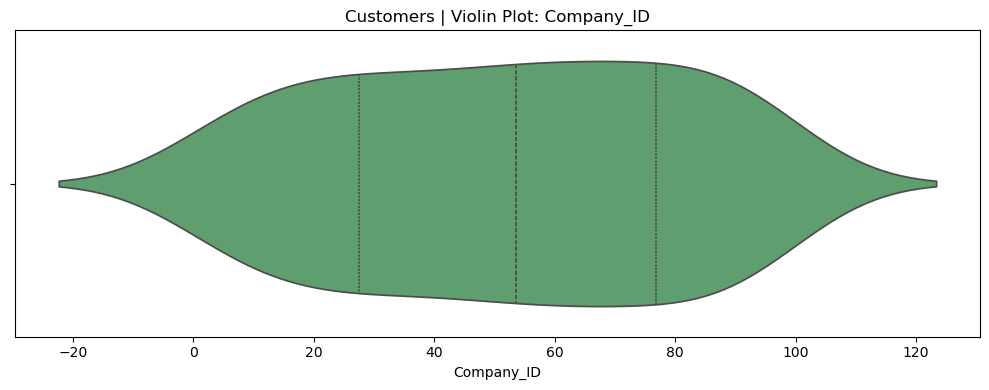

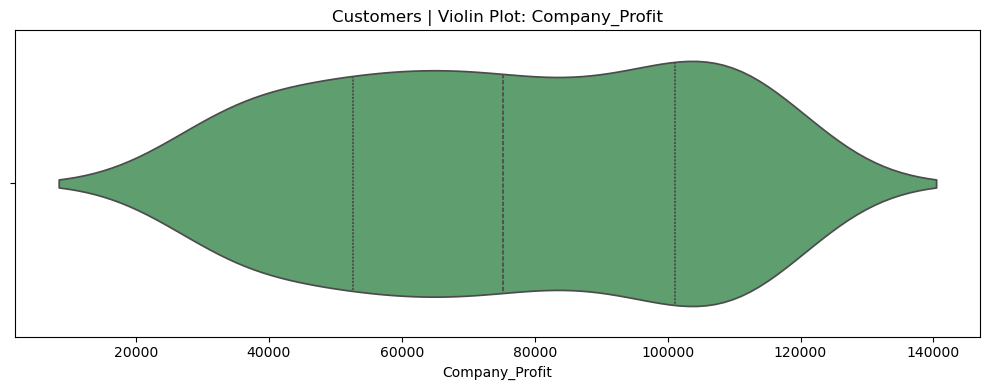

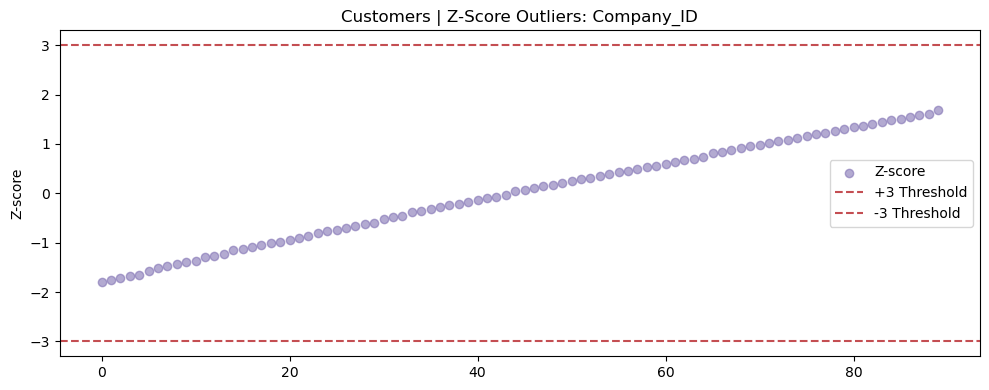

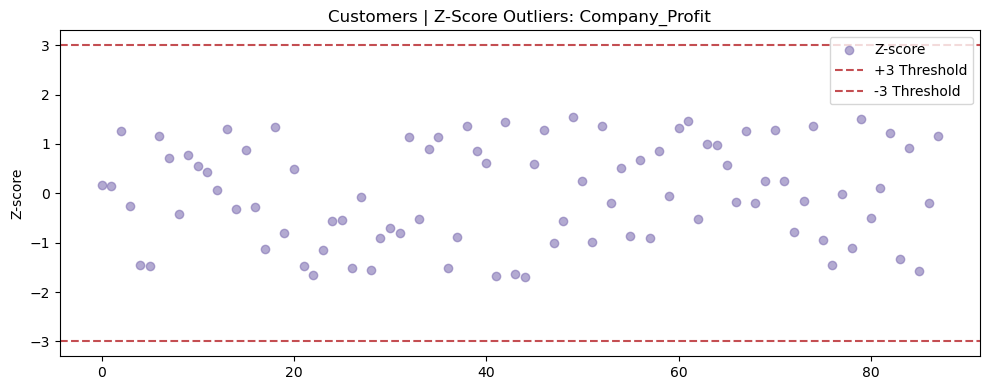

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# ============================================================
# COLORED OUTLIER VISUALIZATION SUITE
# (same logic, clearer colors for understanding)
# ============================================================

def outlier_analysis_colored(df, name, max_cols=6):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()[:max_cols]

    print(f"\n================ {name.upper()} OUTLIER ANALYSIS ================\n")
    print("Numeric columns:", num_cols)

    # Color palettes
    hist_color   = "#4C72B0"   # blue
    box_color    = "#DD8452"   # orange
    violin_color = "#55A868"   # green
    scatter_col  = "#8172B3"   # purple
    outlier_col  = "#C44E52"   # red
    bound_col    = "#E24A33"   # dark red

    # ----------------------------
    # 1) Histogram + KDE (Distribution)
    # ----------------------------
    for c in num_cols:
        plt.figure()
        sns.histplot(df[c], kde=True, bins=30, color=hist_color)
        plt.title(f"{name} | Histogram + KDE: {c}")
        plt.xlabel(c)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

    # ----------------------------
    # 2) Boxplot (Summary)
    # ----------------------------
    for c in num_cols:
        plt.figure()
        sns.boxplot(x=df[c], color=box_color)
        plt.title(f"{name} | Boxplot: {c}")
        plt.tight_layout()
        plt.show()

    # ----------------------------
    # 3) IQR Scatter (Outlier Bounds)
    # ----------------------------
    for c in num_cols:
        x = df[c].dropna()
        q1, q3 = x.quantile(0.25), x.quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        plt.figure()
        plt.scatter(range(len(x)), x, color=scatter_col, alpha=0.6, label="Values")
        plt.axhline(lower, color=bound_col, linestyle="--", label="Lower IQR")
        plt.axhline(upper, color=bound_col, linestyle="--", label="Upper IQR")
        plt.title(f"{name} | IQR Outlier View: {c}")
        plt.ylabel(c)
        plt.legend()
        plt.tight_layout()
        plt.show()

    # ----------------------------
    # 4) Violin Plot (Density)
    # ----------------------------
    for c in num_cols:
        plt.figure()
        sns.violinplot(x=df[c], color=violin_color, inner="quartile")
        plt.title(f"{name} | Violin Plot: {c}")
        plt.tight_layout()
        plt.show()

    # ----------------------------
    # 5) Z-Score Plot (Anomalies)
    # ----------------------------
    for c in num_cols:
        z = zscore(df[c].dropna())

        plt.figure()
        plt.scatter(range(len(z)), z, color=scatter_col, alpha=0.6, label="Z-score")
        plt.axhline(3, color=outlier_col, linestyle="--", label="+3 Threshold")
        plt.axhline(-3, color=outlier_col, linestyle="--", label="-3 Threshold")
        plt.title(f"{name} | Z-Score Outliers: {c}")
        plt.ylabel("Z-score")
        plt.legend()
        plt.tight_layout()
        plt.show()


# ============================================================
# RUN FOR YOUR DATASETS
# ============================================================
outlier_analysis_colored(tx, "Transactions")
outlier_analysis_colored(cu, "Customers")
# outlier_analysis_colored(pr, "Products")  # optional


In [9]:
pr_clean = pr.copy()

# Drop rows missing Product_ID (can't merge without key)
pr_clean = pr_clean.dropna(subset=["Product_ID"]).copy()

# Convert IDs
pr_clean["Product_ID"] = pd.to_numeric(pr_clean["Product_ID"], errors="coerce")

# Clean Product_Price: remove non-digits/commas then convert
def money_to_float(x):
    if pd.isna(x):
        return np.nan
    s = str(x)
    s = re.sub(r"[^\d,\.]", "", s)   # keep digits, comma, dot
    s = s.replace(",", "")
    return pd.to_numeric(s, errors="coerce")

pr_clean["Product_Price"] = pr_clean["Product_Price"].apply(money_to_float)

print("✅ Products cleaned:", pr_clean.shape)
pr_clean.head()


✅ Products cleaned: (18, 3)


Product_ID            Product_Name  Product_Price
0         1.0      FinPredictor Suite         140000
1         2.0  MarketMinder Analytics         168000
2         3.0    TrendWise Forecaster         100800
3         4.0  CustomerScope Insights         123200
4         5.0     SalesSync Optimizer          84000

In [10]:
cu_clean = cu.copy()

# Drop rows missing Company_ID (no key for merging)
cu_clean = cu_clean.dropna(subset=["Company_ID"]).copy()
cu_clean["Company_ID"] = pd.to_numeric(cu_clean["Company_ID"], errors="coerce")

# Profit numeric + impute median
cu_clean["Company_Profit"] = pd.to_numeric(cu_clean["Company_Profit"], errors="coerce")
cu_clean["Company_Profit"] = cu_clean["Company_Profit"].fillna(cu_clean["Company_Profit"].median())

# Clean text
for col in ["Company_Name", "Address"]:
    cu_clean[col] = cu_clean[col].astype(str).str.strip()
    cu_clean[col] = cu_clean[col].replace({"": "Unknown", "nan": "Unknown", "None": "Unknown"})

print("✅ Customers cleaned:", cu_clean.shape)
cu_clean.head()


✅ Customers cleaned: (90, 4)


Company_ID          Company_Name  Company_Profit                                            Address
0         1.0  Tech  Enterprises  1         80701.0             EDSA, Barangay 606, Pasig, Philippines
1         2.0   Global  Partners  2         80511.0  Commonwealth Ave, Barangay 789, Taguig, Philip...
2         3.0  Quantum Associates 3        110664.0       Roxas Blvd, Barangay 505, Pasig, Philippines
3         4.0       Prime Network 4         74653.0  Alabang-Zapote Rd, Barangay 202, Taguig, Phili...
4         5.0    Elite  Ventures  5         69427.0    Ayala Avenue, Barangay 101, Makati, Philippines

Invalid Transaction_Date rows: 7480

================ TRANSACTIONS OUTLIER ANALYSIS ================

Numeric columns: ['Transaction_ID', 'Company_ID', 'Product_ID', 'Quantity', 'Product_Price', 'Total_Cost']


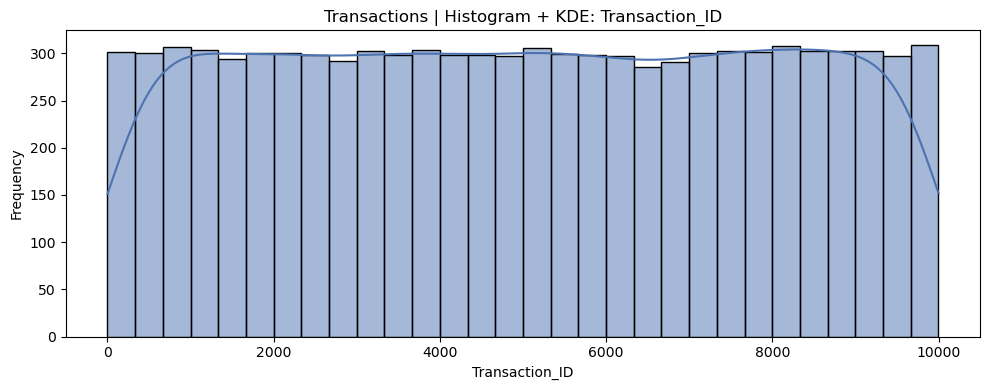

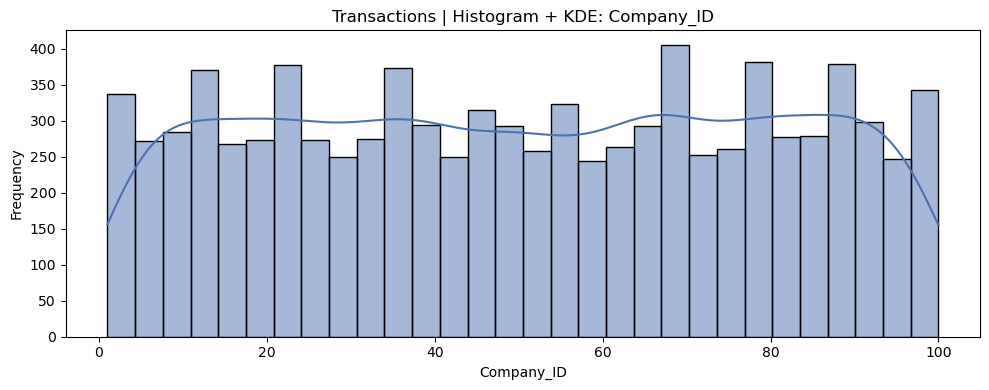

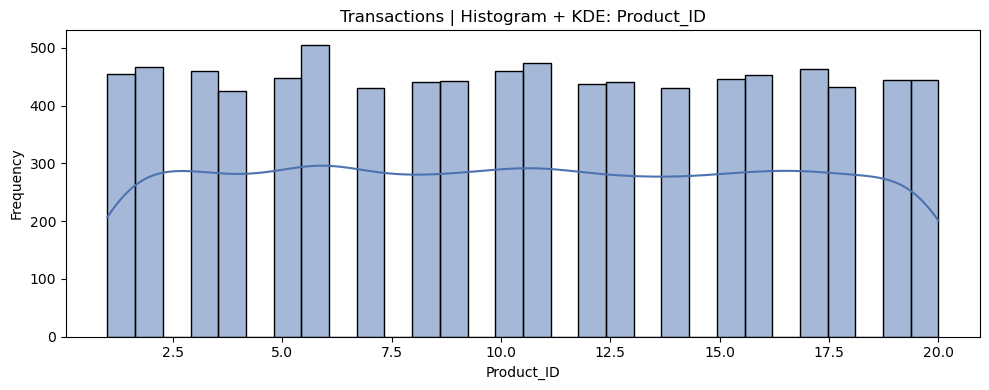

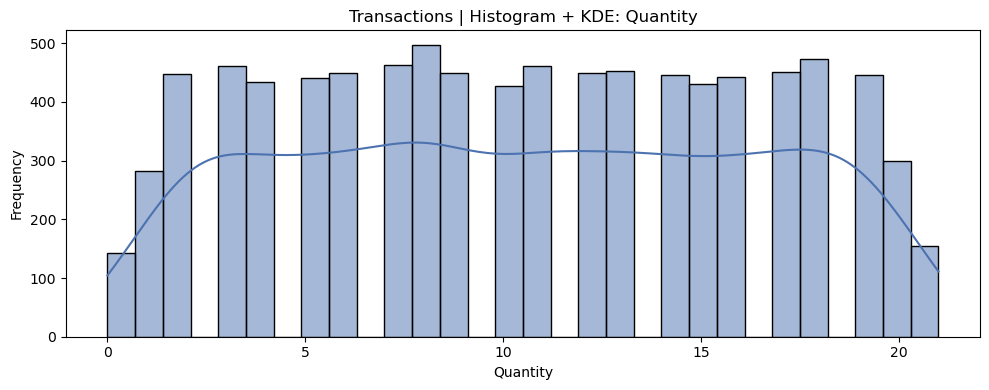

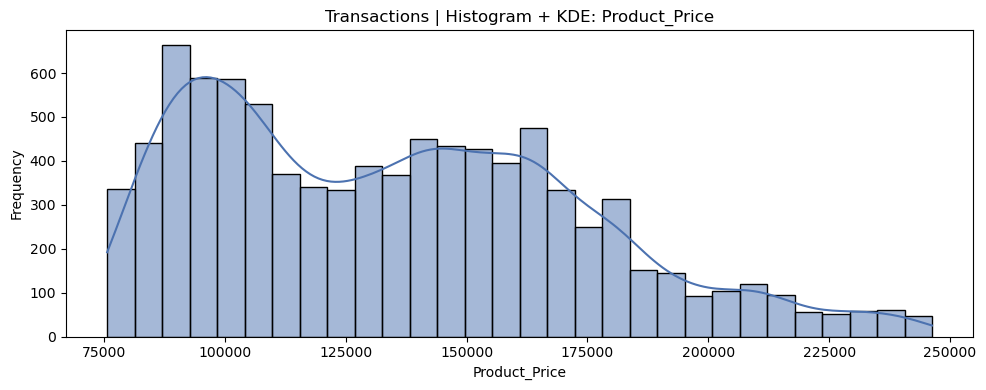

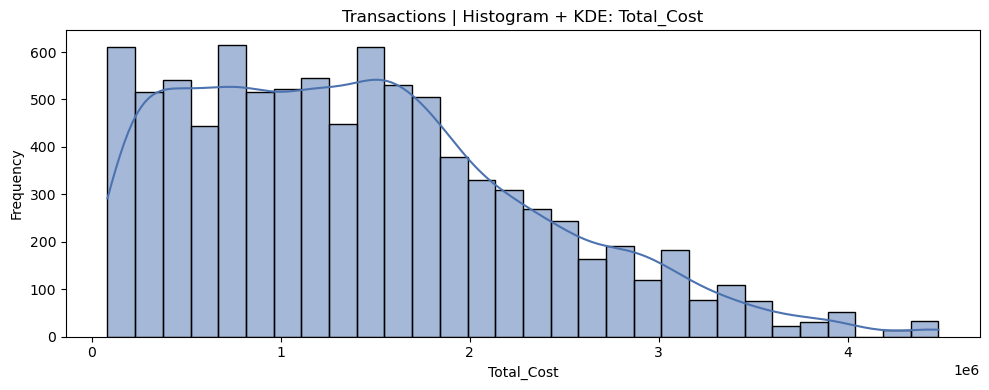

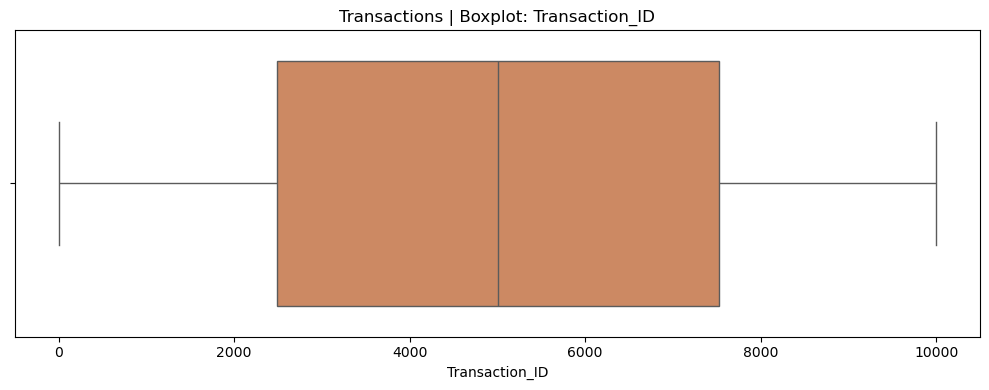

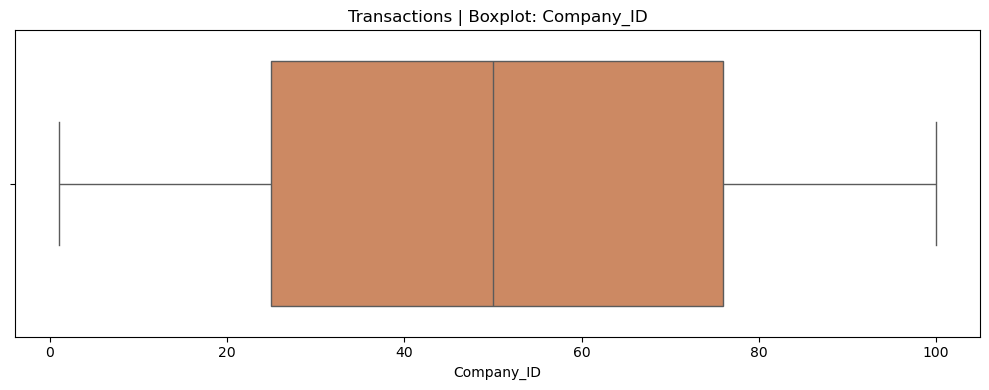

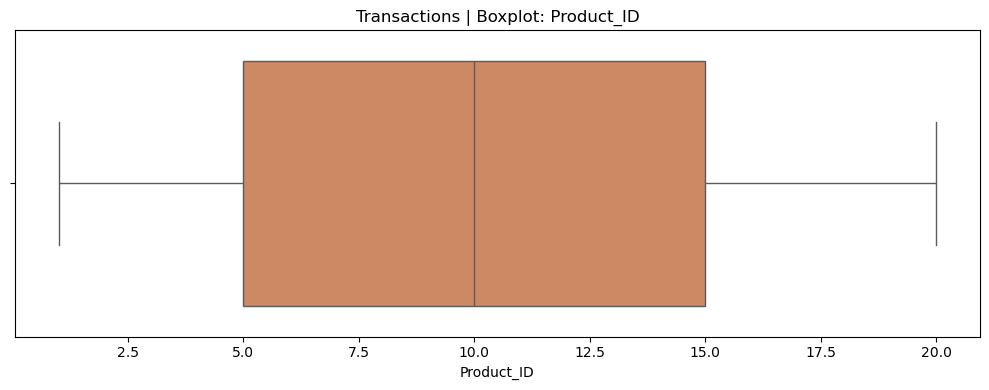

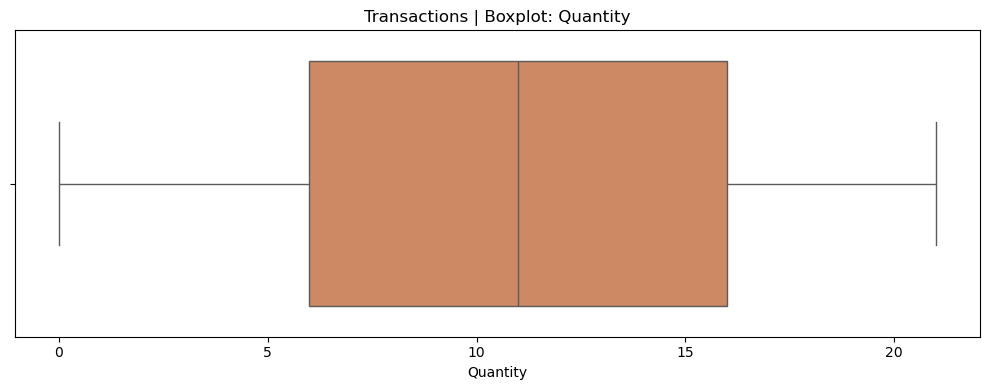

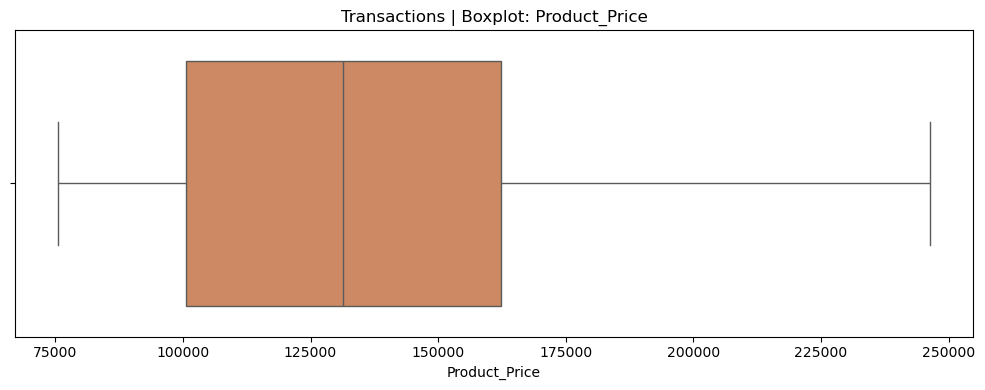

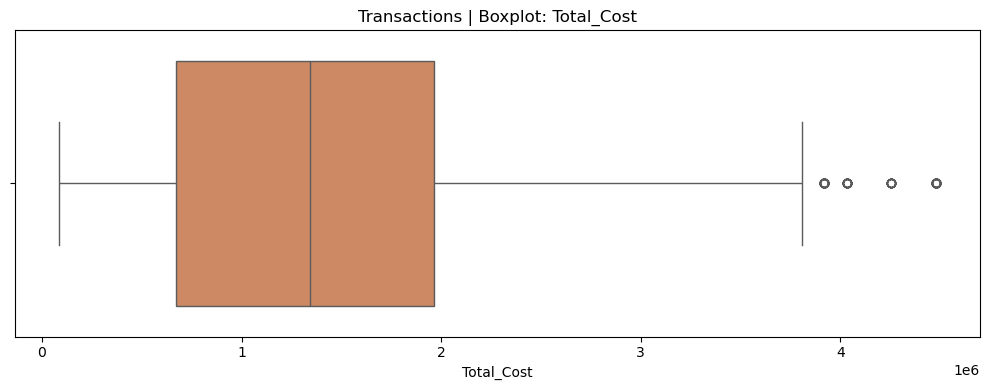

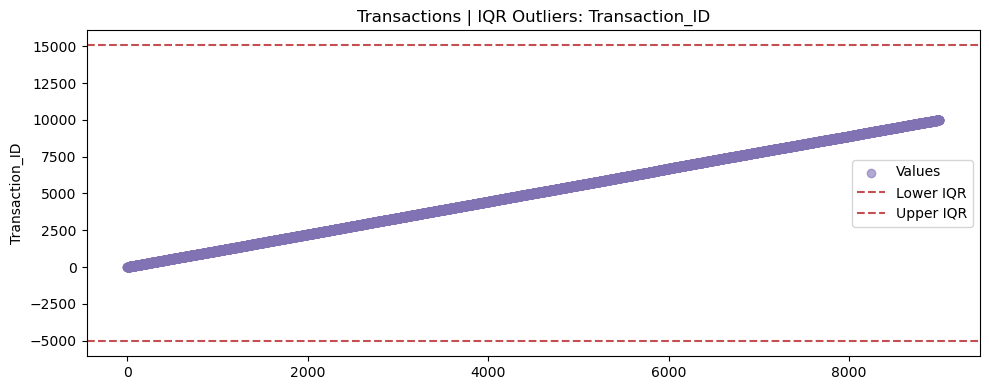

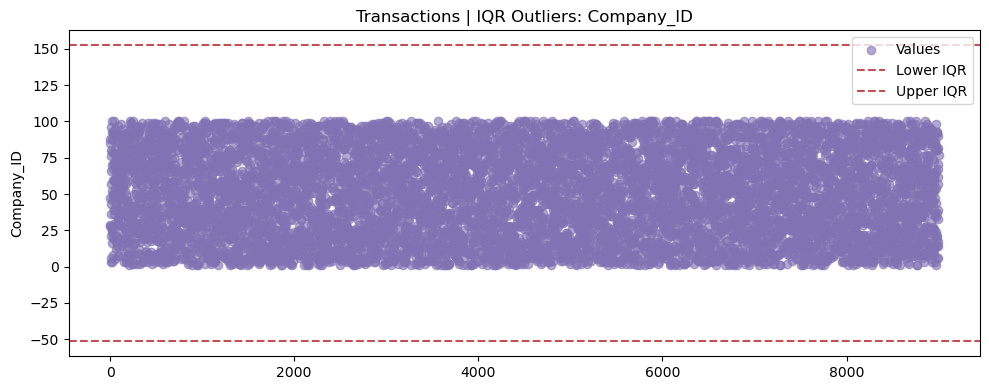

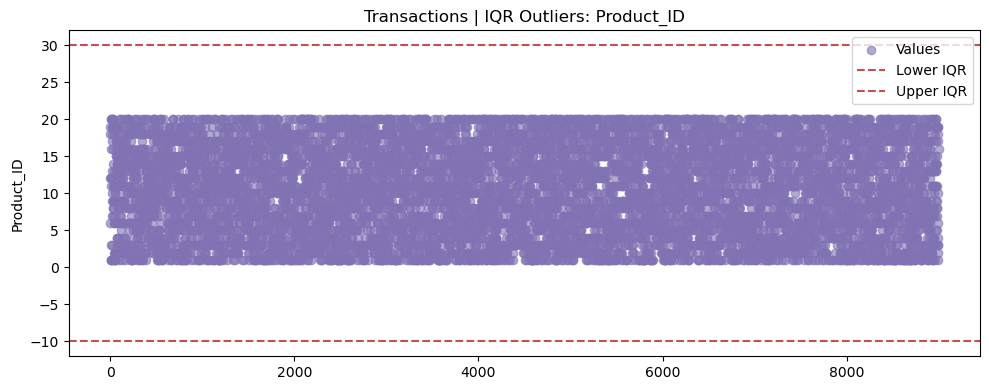

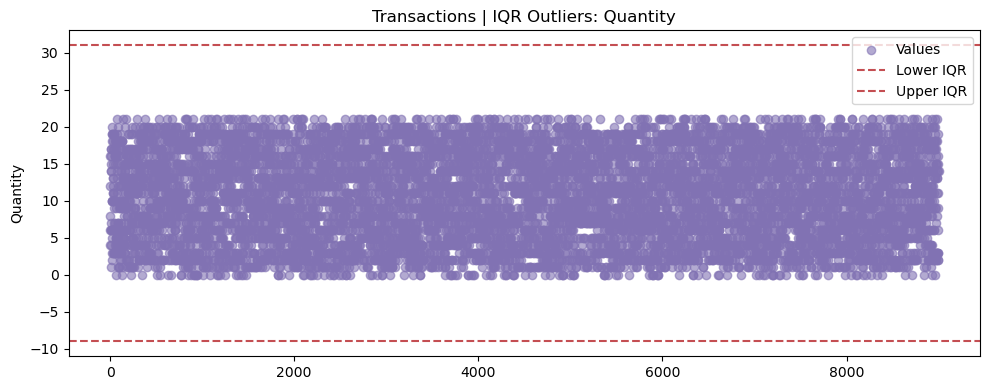

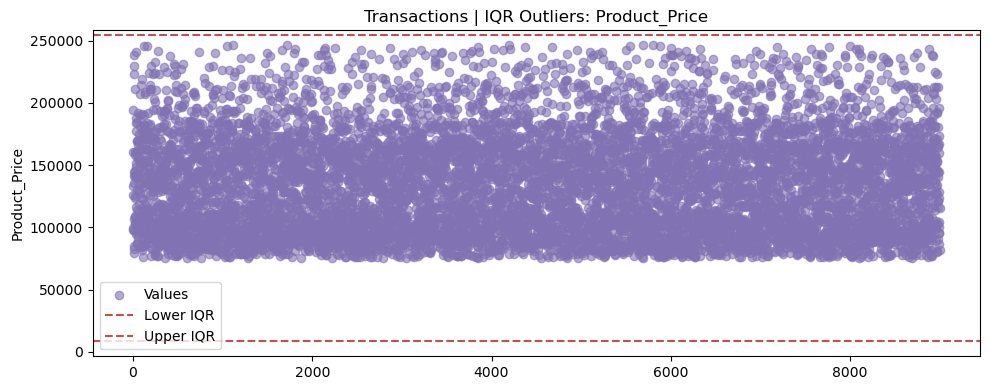

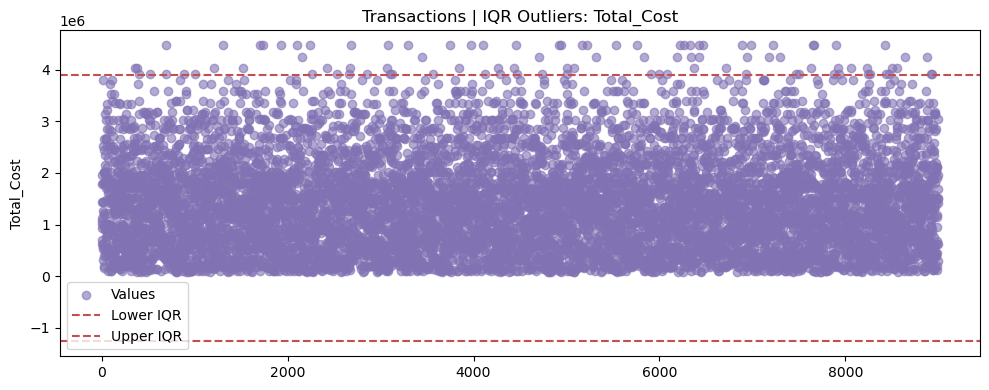

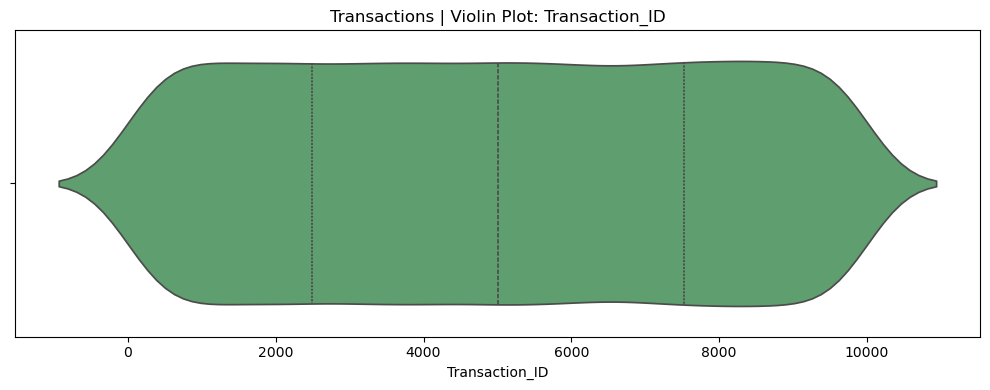

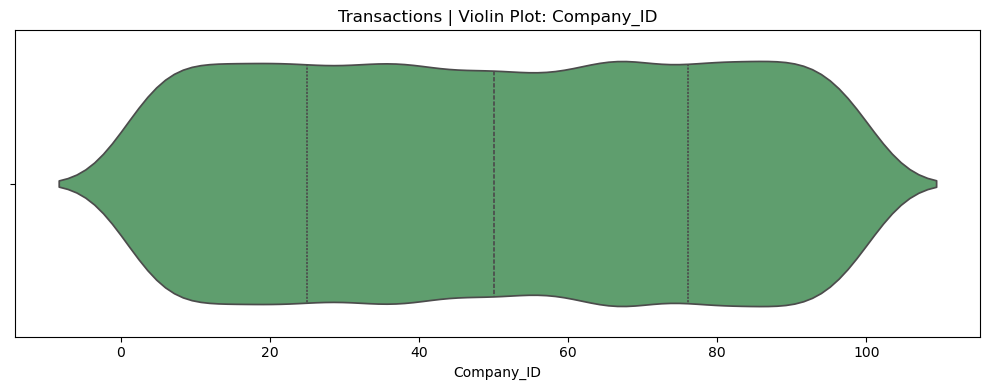

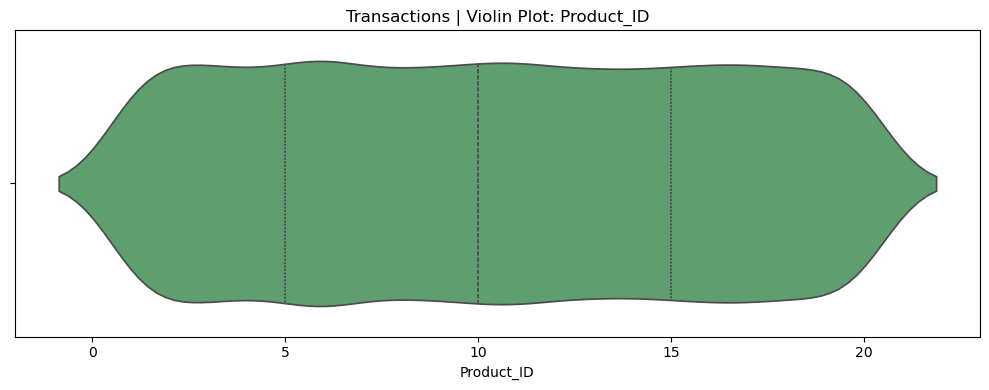

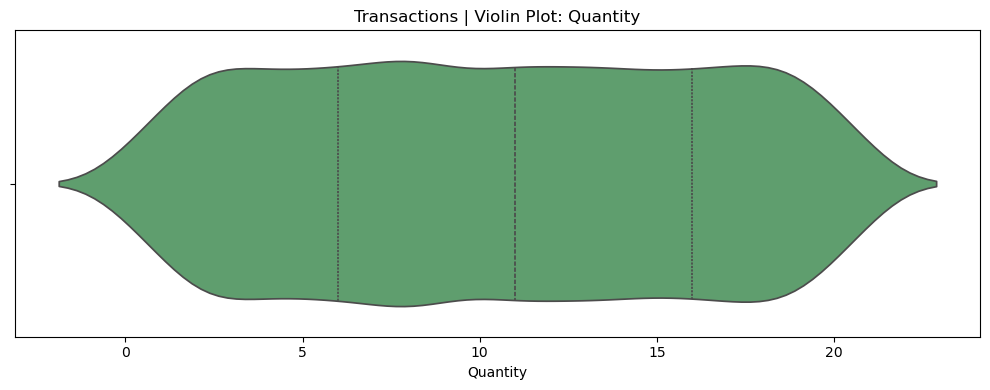

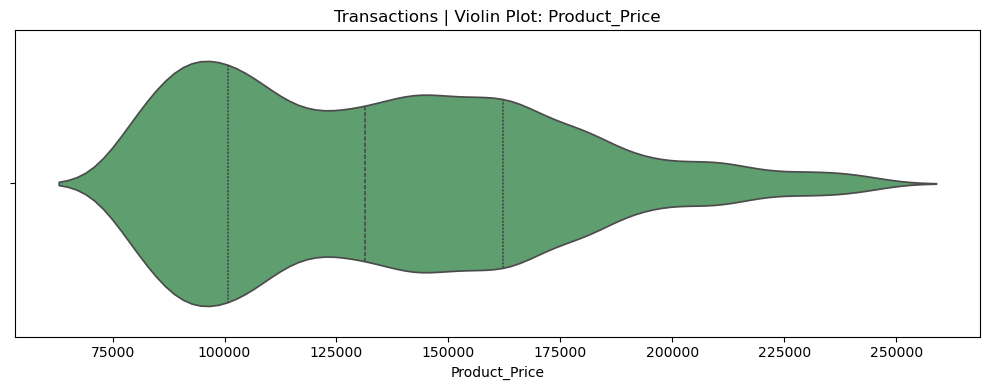

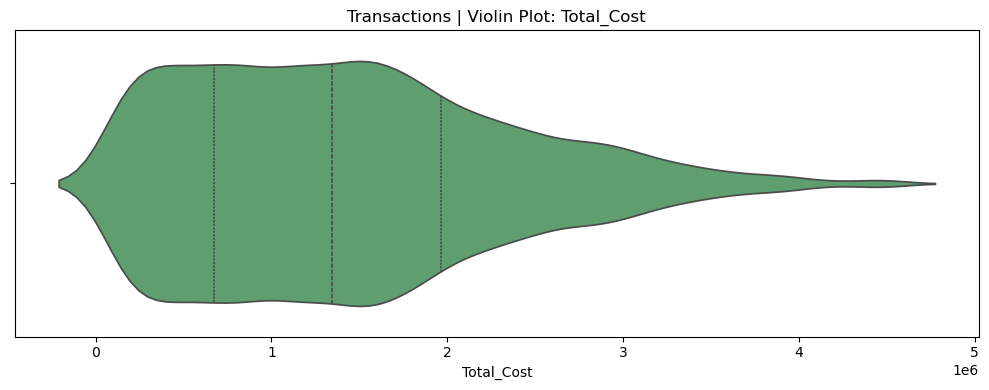

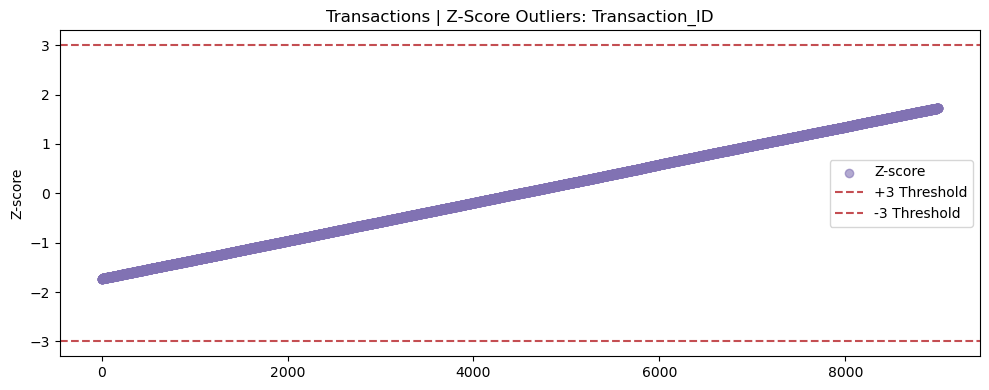

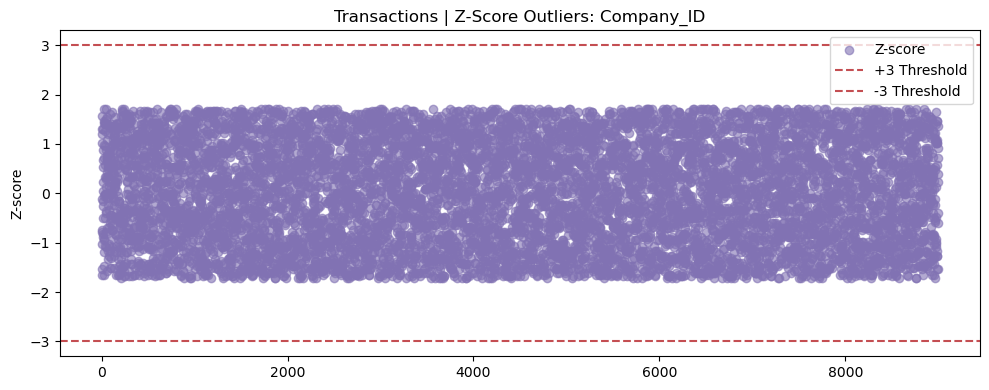

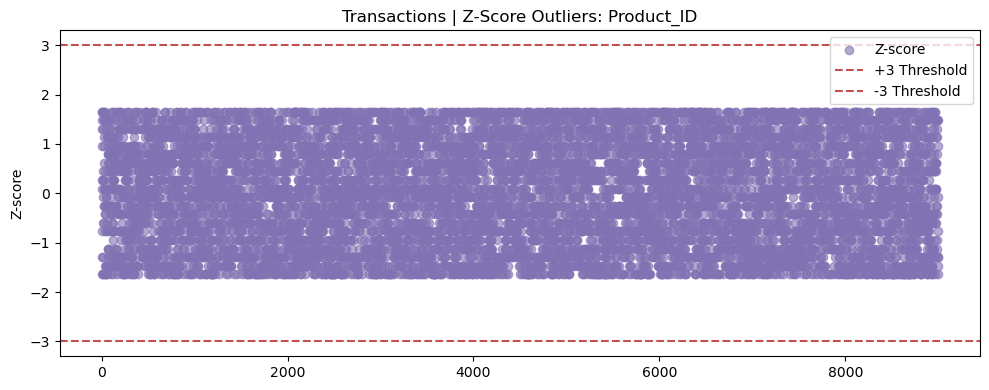

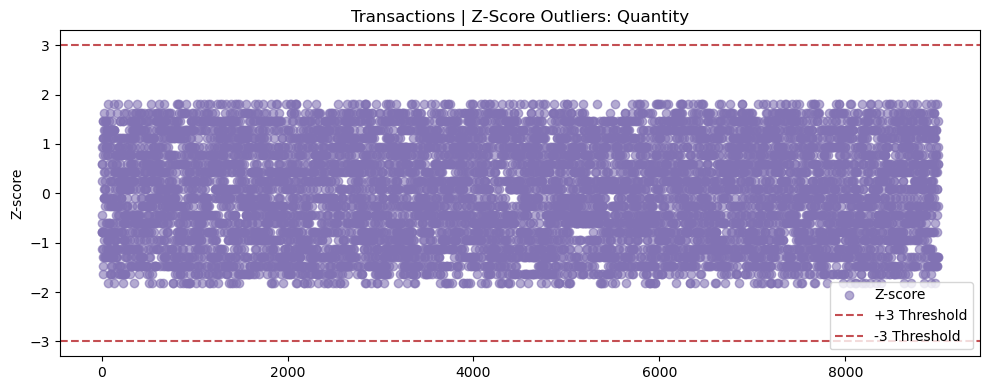

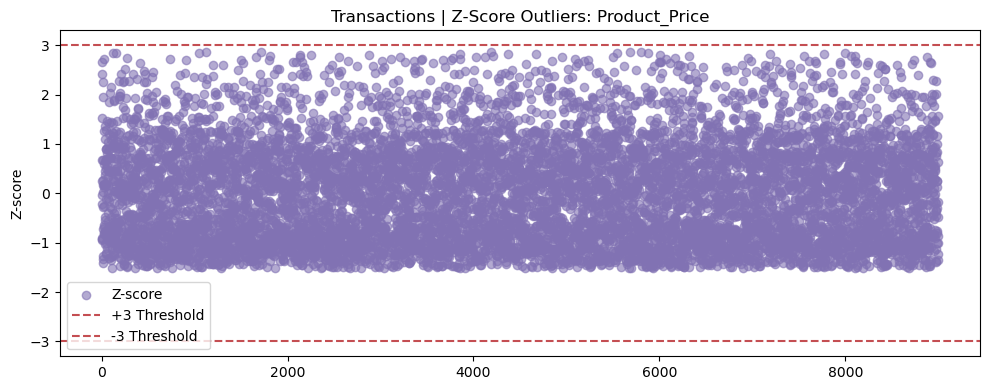

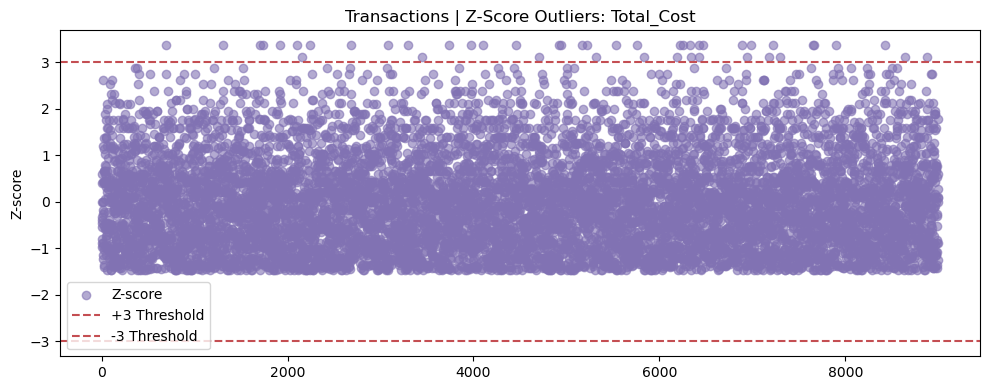


================ CUSTOMERS OUTLIER ANALYSIS ================

Numeric columns: ['Company_ID', 'Company_Profit']


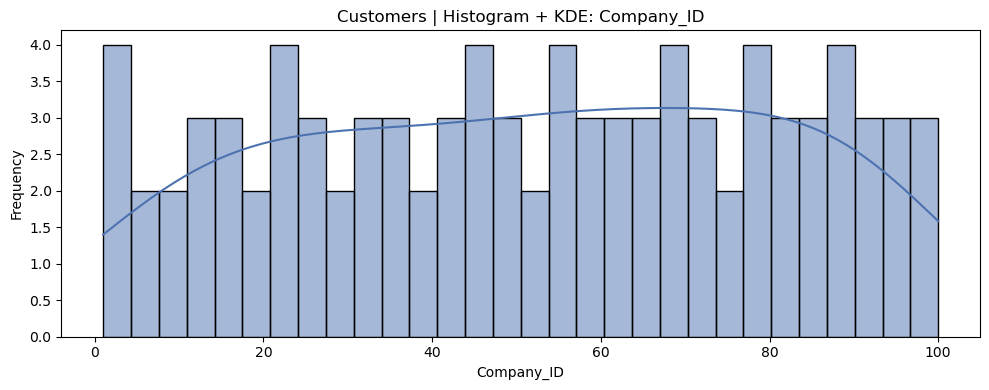

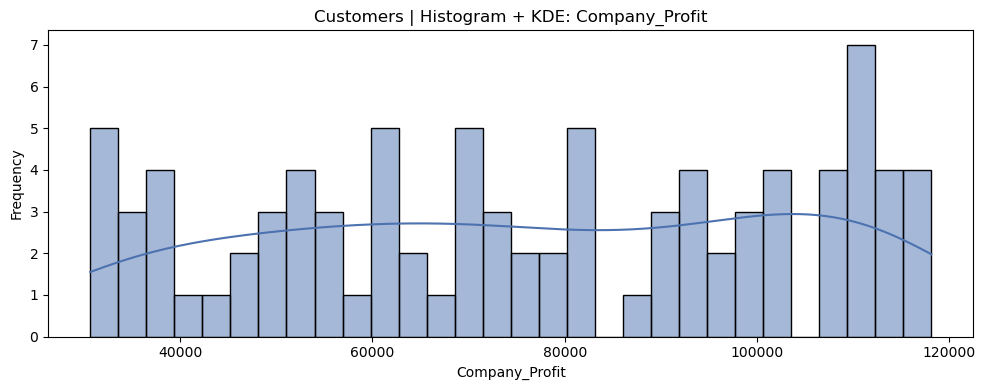

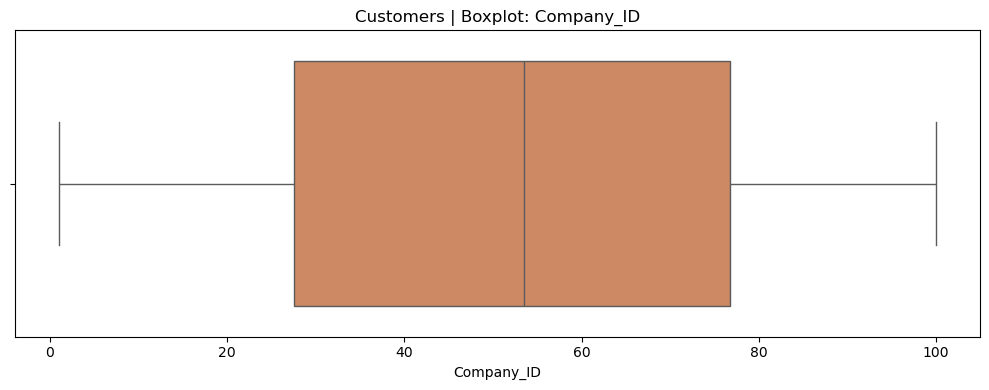

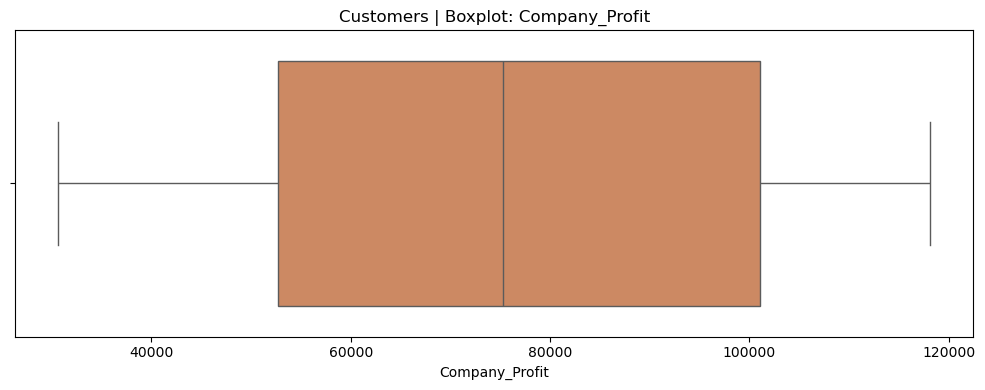

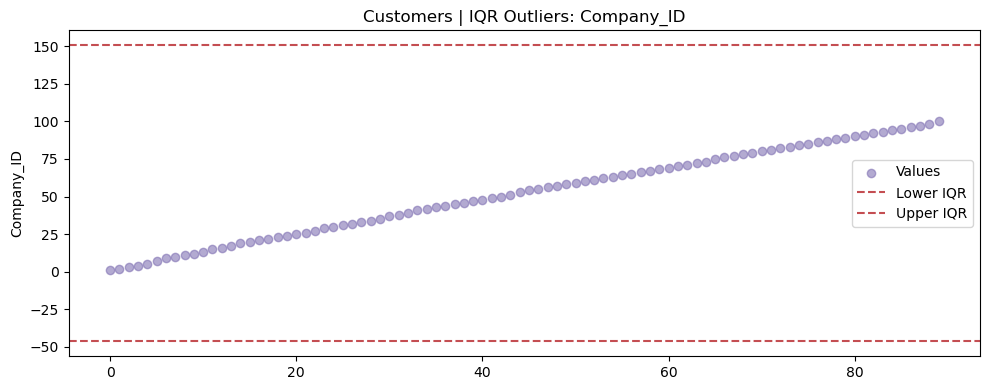

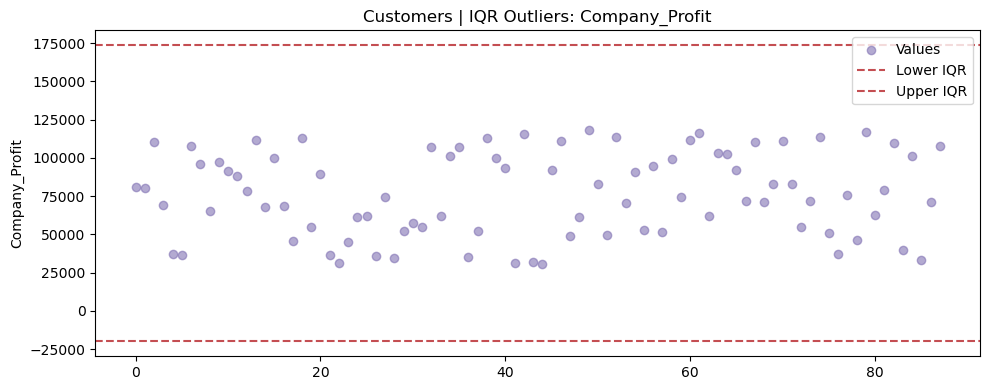

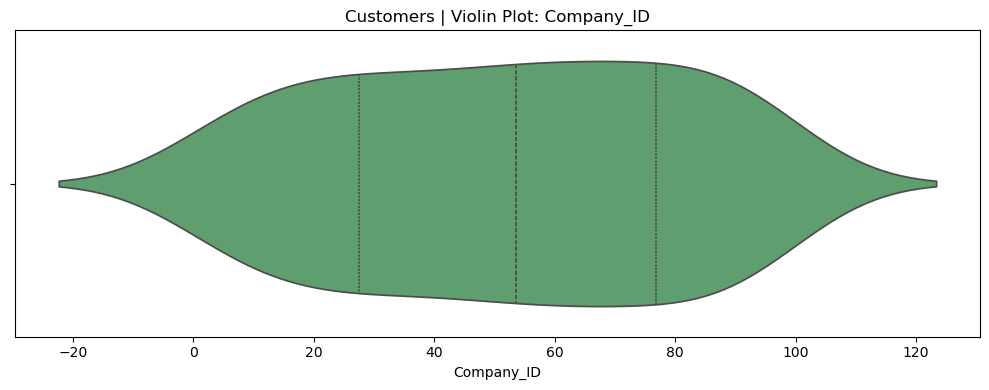

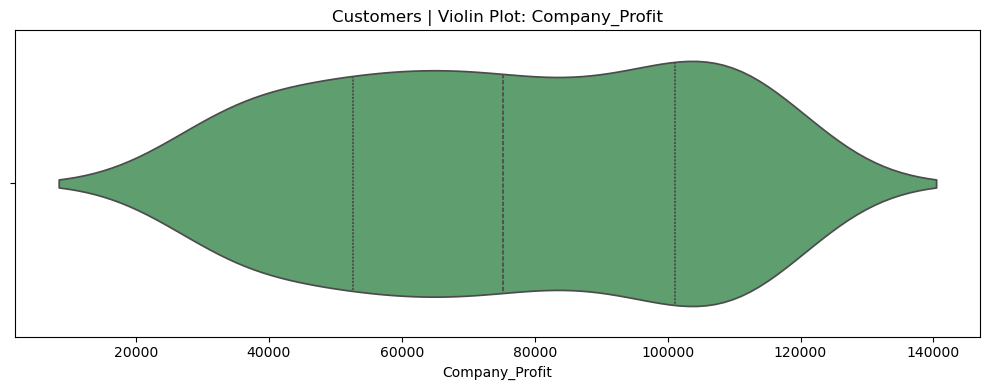

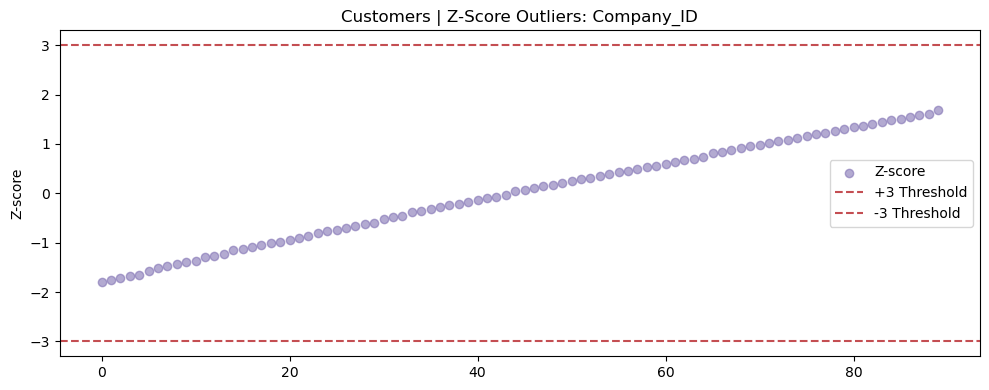

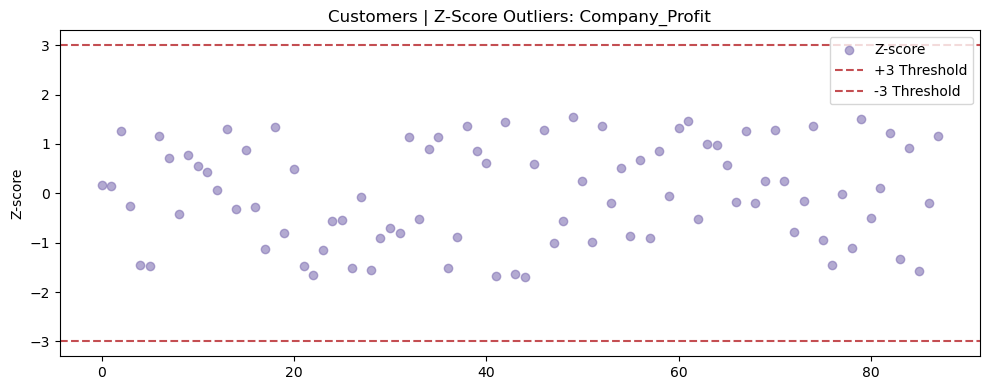

In [27]:
# ============================================================
# COMPLETE OUTLIER VISUALIZATION (COLORED & FIXED)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (10, 4)

# ============================================================
# LOAD DATA (EDIT PATHS IF NEEDED)
# ============================================================

tx = pd.read_csv(r"C:\Users\lawre\Downloads\transactions_data.csv")
cu = pd.read_csv(r"C:\Users\lawre\Downloads\customers_data (1).csv")

# ============================================================
# CLEAN TRANSACTION DATE (FIXED — NO WARNING)
# ============================================================

tx_clean = tx.copy()

# Drop redundant unnamed column if present
for c in tx_clean.columns:
    if "unnamed" in c.lower():
        tx_clean = tx_clean.drop(columns=[c])

# Convert to datetime (NO deprecated args)
tx_clean["Transaction_Date"] = pd.to_datetime(
    tx_clean["Transaction_Date"],
    errors="coerce"
)

print("Invalid Transaction_Date rows:",
      tx_clean["Transaction_Date"].isna().sum())

# ============================================================
# COLORED OUTLIER ANALYSIS FUNCTION
# ============================================================

def outlier_analysis_colored(df, name, max_cols=6):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()[:max_cols]

    print(f"\n================ {name.upper()} OUTLIER ANALYSIS ================\n")
    print("Numeric columns:", num_cols)

    # Color palette
    hist_color   = "#4C72B0"   # blue
    box_color    = "#DD8452"   # orange
    violin_color = "#55A868"   # green
    scatter_col  = "#8172B3"   # purple
    bound_col    = "#C44E52"   # red

    # ----------------------------
    # 1) Histogram + KDE
    # ----------------------------
    for c in num_cols:
        plt.figure()
        sns.histplot(df[c], kde=True, bins=30, color=hist_color)
        plt.title(f"{name} | Histogram + KDE: {c}")
        plt.xlabel(c)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

    # ----------------------------
    # 2) Boxplot
    # ----------------------------
    for c in num_cols:
        plt.figure()
        sns.boxplot(x=df[c], color=box_color)
        plt.title(f"{name} | Boxplot: {c}")
        plt.tight_layout()
        plt.show()

    # ----------------------------
    # 3) IQR Scatter
    # ----------------------------
    for c in num_cols:
        x = df[c].dropna()
        q1, q3 = x.quantile(0.25), x.quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        plt.figure()
        plt.scatter(range(len(x)), x, color=scatter_col, alpha=0.6, label="Values")
        plt.axhline(lower, color=bound_col, linestyle="--", label="Lower IQR")
        plt.axhline(upper, color=bound_col, linestyle="--", label="Upper IQR")
        plt.title(f"{name} | IQR Outliers: {c}")
        plt.ylabel(c)
        plt.legend()
        plt.tight_layout()
        plt.show()

    # ----------------------------
    # 4) Violin Plot
    # ----------------------------
    for c in num_cols:
        plt.figure()
        sns.violinplot(x=df[c], color=violin_color, inner="quartile")
        plt.title(f"{name} | Violin Plot: {c}")
        plt.tight_layout()
        plt.show()

    # ----------------------------
    # 5) Z-Score Plot
    # ----------------------------
    for c in num_cols:
        z = zscore(df[c].dropna())

        plt.figure()
        plt.scatter(range(len(z)), z, color=scatter_col, alpha=0.6, label="Z-score")
        plt.axhline(3, color=bound_col, linestyle="--", label="+3 Threshold")
        plt.axhline(-3, color=bound_col, linestyle="--", label="-3 Threshold")
        plt.title(f"{name} | Z-Score Outliers: {c}")
        plt.ylabel("Z-score")
        plt.legend()
        plt.tight_layout()
        plt.show()

# ============================================================
# RUN ANALYSIS
# ============================================================

outlier_analysis_colored(tx_clean, "Transactions")
outlier_analysis_colored(cu, "Customers")


In [12]:
df = tx_clean.merge(pr_clean, on="Product_ID", how="left", suffixes=("", "_master"))
df = df.merge(cu_clean, on="Company_ID", how="left")

print("✅ Merged dataset shape:", df.shape)
df.head()


✅ Merged dataset shape: (1830, 12)


Transaction_ID  Company_ID  Product_ID  Quantity Transaction_Date  Product_Price  Total_Cost          Product_Name  Product_Price_master          Company_Name  Company_Profit  \
0             1.0        88.0         6.0       6.0       2024-03-26  194379.147964   1075200.0  RevenueVue Dashboard              179200.0   Elite Consulting 88         75950.0   
1             6.0        80.0        11.0       4.0       2021-07-12  160658.675350    627200.0   OptiFlow Automation              156800.0   Green  Partners  80        111227.0   
2            21.0        88.0        13.0       2.0       2024-09-08  210759.801449    392000.0   ForecastXcelerator               196000.0   Elite Consulting 88         75950.0   
3            24.0        70.0         1.0      19.0       2021-05-03  145162.097359   2660000.0    FinPredictor Suite              140000.0      Prime Network 70         62252.0   
4            34.0        92.0         8.0      11.0       2024-02-27  141578.710506   1814400.0                   NaN                   NaN  Innovative  Corp  92         62959.0   

                                             Address  
0            EDSA, Barangay 456, Taguig, Philippines  
1  Commonwealth Ave, Barangay 202, Manila, Philip...  
2            EDSA, Barangay 456, Taguig, Philippines  
3  Alabang-Zapote Rd, Barangay 456, Baguio, Phili...  
4        Taft ave, barangay 202, baguio, philippines

In [13]:
# Compare transaction Product_Price vs products master Product_Price (if present)
if "Product_Price_master" in df.columns:
    df["price_diff"] = df["Product_Price"] - df["Product_Price_master"]
    print("Price diff summary (Transaction - Master):")
    display(df["price_diff"].describe())


Price diff summary (Transaction - Master):


count      1649.000000
mean        230.798556
std       13827.196552
min      -91520.414215
25%       -6410.115492
50%           0.000000
75%        6868.839841
max      196000.000000
Name: price_diff, dtype: float64

In [14]:
# --- Define cutoff for time-based prediction ---
max_date = df["Transaction_Date"].max()
cutoff_date = max_date - pd.Timedelta(days=30)

train_df = df[df["Transaction_Date"] <= cutoff_date].copy()
future_df = df[df["Transaction_Date"] > cutoff_date].copy()

print("Max date   :", max_date)
print("Cutoff date:", cutoff_date)
print("Train rows :", train_df.shape[0])
print("Future rows:", future_df.shape[0])


Max date   : 2024-10-28 00:00:00
Cutoff date: 2024-09-28 00:00:00
Train rows : 1796
Future rows: 34


In [15]:
def build_company_features(tx_df: pd.DataFrame, ref_date: pd.Timestamp) -> pd.DataFrame:
    g = tx_df.groupby("Company_ID")

    feats = pd.DataFrame({
        "transactions_count": g["Transaction_ID"].count(),
        "unique_products": g["Product_ID"].nunique(),
        "total_quantity": g["Quantity"].sum(),
        "avg_quantity": g["Quantity"].mean(),
        "total_spend": g["Total_Cost"].sum(),
        "avg_spend": g["Total_Cost"].mean(),
        "max_spend": g["Total_Cost"].max(),
        "spend_std": g["Total_Cost"].std(),
        "avg_price_paid": g["Product_Price"].mean(),
        "price_std": g["Product_Price"].std(),
        "first_tx_date": g["Transaction_Date"].min(),
        "last_tx_date": g["Transaction_Date"].max(),
    })

    # Recency (days since last transaction)
    feats["recency_days"] = (ref_date - feats["last_tx_date"]).dt.days

    # Interpurchase time (mean days between transactions)
    def mean_gap_days(group):
        d = group.sort_values("Transaction_Date")["Transaction_Date"].values
        if len(d) < 2:
            return np.nan
        gaps = np.diff(d).astype("timedelta64[D]").astype(int)
        return np.mean(gaps)

    gap = tx_df.groupby("Company_ID").apply(mean_gap_days)
    feats["avg_days_between_tx"] = gap

    # Trend: spend last 30 days vs previous 30 days (within training period)
    last30_start = ref_date - pd.Timedelta(days=30)
    prev30_start = ref_date - pd.Timedelta(days=60)

    spend_last30 = tx_df[(tx_df["Transaction_Date"] > last30_start) & (tx_df["Transaction_Date"] <= ref_date)].groupby("Company_ID")["Total_Cost"].sum()
    spend_prev30 = tx_df[(tx_df["Transaction_Date"] > prev30_start) & (tx_df["Transaction_Date"] <= last30_start)].groupby("Company_ID")["Total_Cost"].sum()

    feats["spend_last30"] = spend_last30
    feats["spend_prev30"] = spend_prev30
    feats["spend_last30"] = feats["spend_last30"].fillna(0)
    feats["spend_prev30"] = feats["spend_prev30"].fillna(0)
    feats["spend_growth_30"] = feats["spend_last30"] - feats["spend_prev30"]

    # Clean NaNs
    feats["spend_std"] = feats["spend_std"].fillna(0)
    feats["price_std"] = feats["price_std"].fillna(0)
    feats["avg_days_between_tx"] = feats["avg_days_between_tx"].fillna(feats["avg_days_between_tx"].median())

    # Drop dates after turning into features
    feats = feats.drop(columns=["first_tx_date", "last_tx_date"])

    return feats.reset_index()

X = build_company_features(train_df, ref_date=cutoff_date)
X.head()


C:\Users\lawre\AppData\Local\Temp\ipykernel_10956\2747642530.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gap = tx_df.groupby("Company_ID").apply(mean_gap_days)


Company_ID  transactions_count  unique_products  total_quantity  avg_quantity   total_spend     avg_spend  max_spend     spend_std  avg_price_paid     price_std  recency_days  \
0         1.0                  14                9           157.0     11.214286  2.097541e+07  1.498243e+06  3024000.0  7.692887e+05   144112.726831  49970.799385            80   
1         2.0                  21               11           198.0      9.428571  2.799440e+07  1.333067e+06  4480000.0  9.923027e+05   160952.978258  72815.304205            45   
2         3.0                  14                9           178.0     12.714286  2.630320e+07  1.878800e+06  3724000.0  1.025034e+06   142733.886946  38015.098621            27   
3         4.0                  23               16           219.0      9.521739  3.219939e+07  1.399973e+06  3584000.0  1.063805e+06   143879.979393  36154.985342            64   
4         5.0                  10                9            79.0      7.900000  1.184563e+07  1.184563e+06  2520000.0  8.716410e+05   144633.173527  37760.366036            84   

   avg_days_between_tx  spend_last30  spend_prev30  spend_growth_30  
0           100.769231           0.0           0.0              0.0  
1            65.350000           0.0     1411200.0       -1411200.0  
2           103.692308     2688000.0           0.0        2688000.0  
3            59.863636           0.0           0.0              0.0  
4           146.333333           0.0           0.0              0.0

In [16]:
def build_company_features(tx_df: pd.DataFrame, ref_date: pd.Timestamp) -> pd.DataFrame:
    g = tx_df.groupby("Company_ID")

    feats = pd.DataFrame({
        "transactions_count": g["Transaction_ID"].count(),
        "unique_products": g["Product_ID"].nunique(),
        "total_quantity": g["Quantity"].sum(),
        "avg_quantity": g["Quantity"].mean(),
        "total_spend": g["Total_Cost"].sum(),
        "avg_spend": g["Total_Cost"].mean(),
        "max_spend": g["Total_Cost"].max(),
        "spend_std": g["Total_Cost"].std(),
        "avg_price_paid": g["Product_Price"].mean(),
        "price_std": g["Product_Price"].std(),
        "first_tx_date": g["Transaction_Date"].min(),
        "last_tx_date": g["Transaction_Date"].max(),
    })

    # Recency (days since last transaction)
    feats["recency_days"] = (ref_date - feats["last_tx_date"]).dt.days

    # Interpurchase time (mean days between transactions)
    def mean_gap_days(group):
        d = group.sort_values("Transaction_Date")["Transaction_Date"].values
        if len(d) < 2:
            return np.nan
        gaps = np.diff(d).astype("timedelta64[D]").astype(int)
        return np.mean(gaps)

    gap = tx_df.groupby("Company_ID").apply(mean_gap_days)
    feats["avg_days_between_tx"] = gap

    # Trend: spend last 30 days vs previous 30 days (within training period)
    last30_start = ref_date - pd.Timedelta(days=30)
    prev30_start = ref_date - pd.Timedelta(days=60)

    spend_last30 = tx_df[(tx_df["Transaction_Date"] > last30_start) & (tx_df["Transaction_Date"] <= ref_date)].groupby("Company_ID")["Total_Cost"].sum()
    spend_prev30 = tx_df[(tx_df["Transaction_Date"] > prev30_start) & (tx_df["Transaction_Date"] <= last30_start)].groupby("Company_ID")["Total_Cost"].sum()

    feats["spend_last30"] = spend_last30
    feats["spend_prev30"] = spend_prev30
    feats["spend_last30"] = feats["spend_last30"].fillna(0)
    feats["spend_prev30"] = feats["spend_prev30"].fillna(0)
    feats["spend_growth_30"] = feats["spend_last30"] - feats["spend_prev30"]

    # Clean NaNs
    feats["spend_std"] = feats["spend_std"].fillna(0)
    feats["price_std"] = feats["price_std"].fillna(0)
    feats["avg_days_between_tx"] = feats["avg_days_between_tx"].fillna(feats["avg_days_between_tx"].median())

    # Drop dates after turning into features
    feats = feats.drop(columns=["first_tx_date", "last_tx_date"])

    return feats.reset_index()

X = build_company_features(train_df, ref_date=cutoff_date)
X.head()


C:\Users\lawre\AppData\Local\Temp\ipykernel_10956\2747642530.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gap = tx_df.groupby("Company_ID").apply(mean_gap_days)


Company_ID  transactions_count  unique_products  total_quantity  avg_quantity   total_spend     avg_spend  max_spend     spend_std  avg_price_paid     price_std  recency_days  \
0         1.0                  14                9           157.0     11.214286  2.097541e+07  1.498243e+06  3024000.0  7.692887e+05   144112.726831  49970.799385            80   
1         2.0                  21               11           198.0      9.428571  2.799440e+07  1.333067e+06  4480000.0  9.923027e+05   160952.978258  72815.304205            45   
2         3.0                  14                9           178.0     12.714286  2.630320e+07  1.878800e+06  3724000.0  1.025034e+06   142733.886946  38015.098621            27   
3         4.0                  23               16           219.0      9.521739  3.219939e+07  1.399973e+06  3584000.0  1.063805e+06   143879.979393  36154.985342            64   
4         5.0                  10                9            79.0      7.900000  1.184563e+07  1.184563e+06  2520000.0  8.716410e+05   144633.173527  37760.366036            84   

   avg_days_between_tx  spend_last30  spend_prev30  spend_growth_30  
0           100.769231           0.0           0.0              0.0  
1            65.350000           0.0     1411200.0       -1411200.0  
2           103.692308     2688000.0           0.0        2688000.0  
3            59.863636           0.0           0.0              0.0  
4           146.333333           0.0           0.0              0.0

In [17]:
# Label: 1 if company appears in future_df, else 0
future_buyers = set(future_df["Company_ID"].unique())
X["will_buy_next_30d"] = X["Company_ID"].apply(lambda cid: 1 if cid in future_buyers else 0)

X["will_buy_next_30d"].value_counts()


will_buy_next_30d
0    74
1    26
Name: count, dtype: int64

In [18]:
# Merge customer/company features
X = X.merge(cu_clean[["Company_ID", "Company_Profit", "Company_Name", "Address"]], on="Company_ID", how="left")

# Simple engineered features from Address/Name
X["company_name_len"] = X["Company_Name"].astype(str).str.len()
X["address_len"] = X["Address"].astype(str).str.len()
X["zip4"] = X["Address"].astype(str).str.extract(r"(\b\d{4}\b)", expand=False).fillna("Unknown")

X.head()


Company_ID  transactions_count  unique_products  total_quantity  avg_quantity   total_spend     avg_spend  max_spend     spend_std  avg_price_paid     price_std  recency_days  \
0         1.0                  14                9           157.0     11.214286  2.097541e+07  1.498243e+06  3024000.0  7.692887e+05   144112.726831  49970.799385            80   
1         2.0                  21               11           198.0      9.428571  2.799440e+07  1.333067e+06  4480000.0  9.923027e+05   160952.978258  72815.304205            45   
2         3.0                  14                9           178.0     12.714286  2.630320e+07  1.878800e+06  3724000.0  1.025034e+06   142733.886946  38015.098621            27   
3         4.0                  23               16           219.0      9.521739  3.219939e+07  1.399973e+06  3584000.0  1.063805e+06   143879.979393  36154.985342            64   
4         5.0                  10                9            79.0      7.900000  1.184563e+07  1.184563e+06  2520000.0  8.716410e+05   144633.173527  37760.366036            84   

   avg_days_between_tx  spend_last30  spend_prev30  spend_growth_30  will_buy_next_30d  Company_Profit          Company_Name                                            Address  \
0           100.769231           0.0           0.0              0.0                  0         80701.0  Tech  Enterprises  1             EDSA, Barangay 606, Pasig, Philippines   
1            65.350000           0.0     1411200.0       -1411200.0                  1         80511.0   Global  Partners  2  Commonwealth Ave, Barangay 789, Taguig, Philip...   
2           103.692308     2688000.0           0.0        2688000.0                  0        110664.0  Quantum Associates 3       Roxas Blvd, Barangay 505, Pasig, Philippines   
3            59.863636           0.0           0.0              0.0                  0         74653.0       Prime Network 4  Alabang-Zapote Rd, Barangay 202, Taguig, Phili...   
4           146.333333           0.0           0.0              0.0                  1         69427.0    Elite  Ventures  5    Ayala Avenue, Barangay 101, Makati, Philippines   

   company_name_len  address_len     zip4  
0                20           38  Unknown  
1                19           51  Unknown  
2                20           44  Unknown  
3                15           52  Unknown  
4                18           47  Unknown

In [19]:
# Final ML dataset: keep target separate
target = "will_buy_next_30d"

y = X[target]
X_model = X.drop(columns=[target], errors="ignore")

# One-hot encode categoricals
X_encoded = pd.get_dummies(X_model, drop_first=True)

final_df = X_encoded.copy()
final_df[target] = y.values

print("✅ Final modeling dataset shape:", final_df.shape)
final_df.head()


✅ Final modeling dataset shape: (100, 195)


Company_ID  transactions_count  unique_products  total_quantity  avg_quantity   total_spend     avg_spend  max_spend     spend_std  avg_price_paid     price_std  recency_days  \
0         1.0                  14                9           157.0     11.214286  2.097541e+07  1.498243e+06  3024000.0  7.692887e+05   144112.726831  49970.799385            80   
1         2.0                  21               11           198.0      9.428571  2.799440e+07  1.333067e+06  4480000.0  9.923027e+05   160952.978258  72815.304205            45   
2         3.0                  14                9           178.0     12.714286  2.630320e+07  1.878800e+06  3724000.0  1.025034e+06   142733.886946  38015.098621            27   
3         4.0                  23               16           219.0      9.521739  3.219939e+07  1.399973e+06  3584000.0  1.063805e+06   143879.979393  36154.985342            64   
4         5.0                  10                9            79.0      7.900000  1.184563e+07  1.184563e+06  2520000.0  8.716410e+05   144633.173527  37760.366036            84   

   avg_days_between_tx  spend_last30  spend_prev30  spend_growth_30  Company_Profit  company_name_len  address_len  Company_Name_Dynamic  Ventures  73  \
0           100.769231           0.0           0.0              0.0         80701.0                20           38                               False   
1            65.350000           0.0     1411200.0       -1411200.0         80511.0                19           51                               False   
2           103.692308     2688000.0           0.0        2688000.0        110664.0                20           44                               False   
3            59.863636           0.0           0.0              0.0         74653.0                15           52                               False   
4           146.333333           0.0           0.0              0.0         69427.0                18           47                               False   

   Company_Name_Dynamic Enterprises 21  Company_Name_Dynamic Solutions 17  Company_Name_Dynamic Solutions 7  Company_Name_Dynamic Ventures 11  Company_Name_Dynamic Ventures 46  \
0                                False                              False                             False                             False                             False   
1                                False                              False                             False                             False                             False   
2                                False                              False                             False                             False                             False   
3                                False                              False                             False                             False                             False   
4                                False                              False                             False                             False                             False   

   Company_Name_Elite  Associates  59  Company_Name_Elite  Ventures  5  Company_Name_Elite Consulting 88  Company_Name_Elite Corp 27  Company_Name_Elite Enterprises 81  \
0                               False                            False                             False                       False                              False   
1                               False                            False                             False                       False                              False   
2                               False                            False                             False                       False                              False   
3                               False                            False                             False                       False                              False   
4                               False                        

In [20]:
tx_clean.to_csv(TX_CLEAN_PATH, index=False)
pr_clean.to_csv(PR_CLEAN_PATH, index=False)
cu_clean.to_csv(CU_CLEAN_PATH, index=False)
final_df.to_csv(FEATURES_PATH, index=False)

print("✅ Saved outputs to:", OUT_DIR)
print(" -", TX_CLEAN_PATH)
print(" -", PR_CLEAN_PATH)
print(" -", CU_CLEAN_PATH)
print(" -", FEATURES_PATH)


✅ Saved outputs to: C:\Users\lawre\Downloads\eda_outputs
 - C:\Users\lawre\Downloads\eda_outputs\transactions_cleaned.csv
 - C:\Users\lawre\Downloads\eda_outputs\products_cleaned.csv
 - C:\Users\lawre\Downloads\eda_outputs\customers_cleaned.csv
 - C:\Users\lawre\Downloads\eda_outputs\company_features_purchase_behavior.csv
